# Aprendizaje NO Supervisado

### Practico 1

In [1]:
# Imports
from aNs_lib import np
from aNs_lib import pd,plt,season_north_doy,season_south_doy
from aNs_lib import load_model,get_nearest_cent_mbound,get_nearest_cent_cosine

### Sobre el data-set

El mismo comprende una serie de mediciones sobre ciertos instrumentos pertenecientes a una plataforma satelital. En las mismas se mezclan voltajes, temperaturas,corrientes y demas variables de interes para la plataforma. Las mismas corresponden a un valor medio diario comenzando en el Doy (day of year) 305 del año 2014. En el mismo NO existen variables categoricas.


In [2]:
# Load Data
sat=pd.read_csv('sat_20141101000000_20180630000000_Trend_FULLASCII_mean.txt')
sat.head(5)

%Year  Doy       BNS0000   OIT0001    OIT0002    OIT0003   I1A0008  \
0   2014  305  41326.804688  5.091096  12.073962 -11.990278  0.116408   
1   2014  306  41308.589844  5.089764  12.073640 -11.989700  0.116036   
2   2014  307  40968.605469  5.089020  12.073705 -11.989796  0.116225   
3   2014  308  40968.605469  5.089558  12.073786 -11.989727  0.116135   
4   2014  309  39698.847656  5.091444  12.073763 -11.989621  0.116235   

    OIT0009   OIT0010   OIT0011    ...        OIT0250    OIT0174    OIT0173  \
0  0.081406  0.997386  0.191994    ...      15.643101  15.580791  27.631519   
1  0.081288  0.997683  0.191994    ...      15.763145  15.488487  25.341501   
2  0.081350  0.998142  0.191994    ...      15.847198  15.221483  26.834898   
3  0.083768  0.998208  0.191994    ...      15.558172  15.452912  27.296343   
4  0.084622  0.997786  0.191994    ...      15.467229  15.178322  27.347403   

     OIT0080    OIT0112    OIT0141    OIT0065    OIT0205    OIT0235    OIT0266  
0  30.643078  29.056545  29.971384  26.877924  15.675941  15.060965  14.498721  
1  28.344614  27.039883  27.063114  30.430914  15.802736  13.592725  14.222369  
2  30.065567  28.644672  25.668518  28.024366  13.654709  13.581483  15.084678  
3  30.382460  29.361914  25.557888  28.053070  14.447669  13.962523  15.194866  
4  30.333233  29.105133  24.408880  28.709978  15.622093  14.719094  14.970345  

[5 rows x 127 columns]

In [3]:
# Generamos algunos features mas
sat['year_doy']=sat['%Year']+sat['Doy']/366
sat['season']=sat['Doy'].apply(lambda x: season_south_doy(x))

In [4]:
# Load Data Names
sat_names=load_model('sat_names')
sat_list=list(sat_names.keys())

### Análisis sin PCA

Elegimos algunas variables y analizamos el comportamiento en funcion del numero de clsuters/iteraciones/semillas

NOTA: Que es lo que esperaria? La evolucion termica del satelite sigue la estacionalidad (salvo instrumental que se mantenga a T=cte) por lo que no esperaria ver cambios sustanciales n=[2,3,4] clusters (siguiendo a las estaciones).

### KMeans

In [5]:
from sklearn.cluster import KMeans

#### Clustering con el Set Completo (sin DOY/%Year/year_doy)
Veamos el efecto de efectuar KMeans en el set completo de informacion. Aqui podriamos tener algun tema, puesto que dependiendo de la ubicacion del instrumental en el Satelite, un mismo estado puede tener los dos extremos en voltages, temperaturas o corrientes por ejemplo.

**Cluster Size  -  n_init**

In [6]:
# Clusters
cl_num=[2,3,4,10]
y_case=['OIT0001','BOS0026','I1A0008']
var_int=sat_list
stat_dict={}

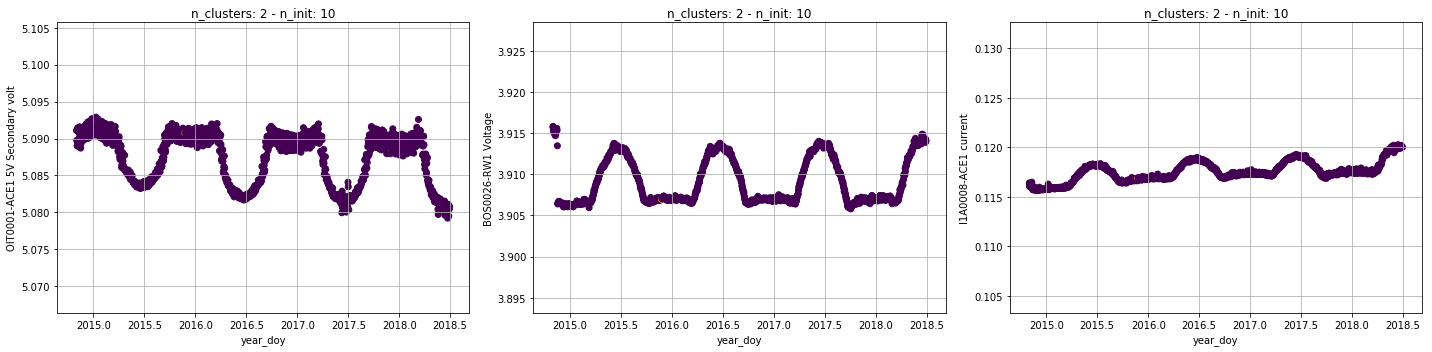

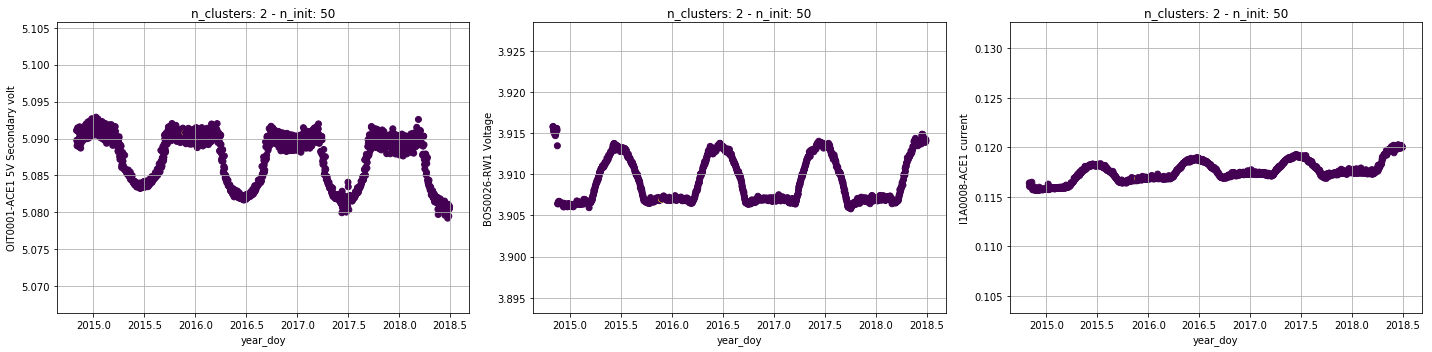

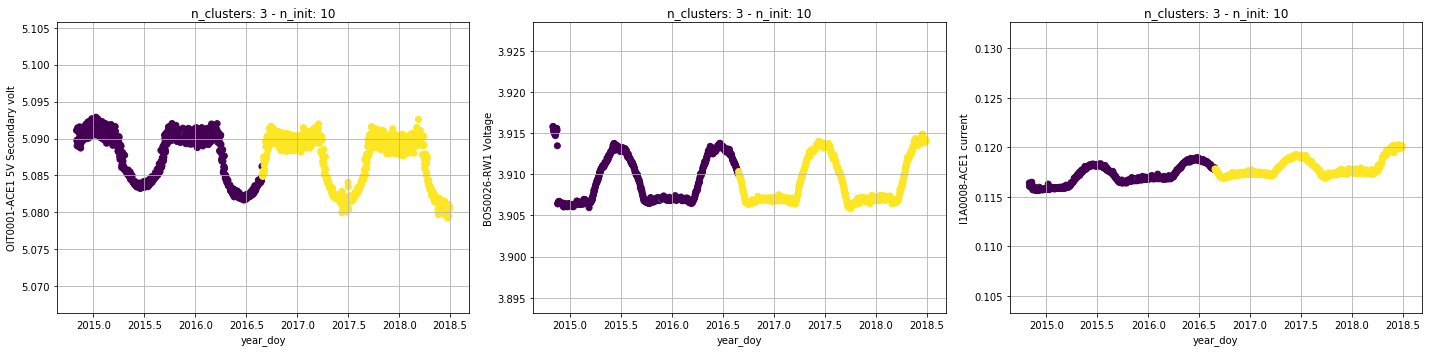

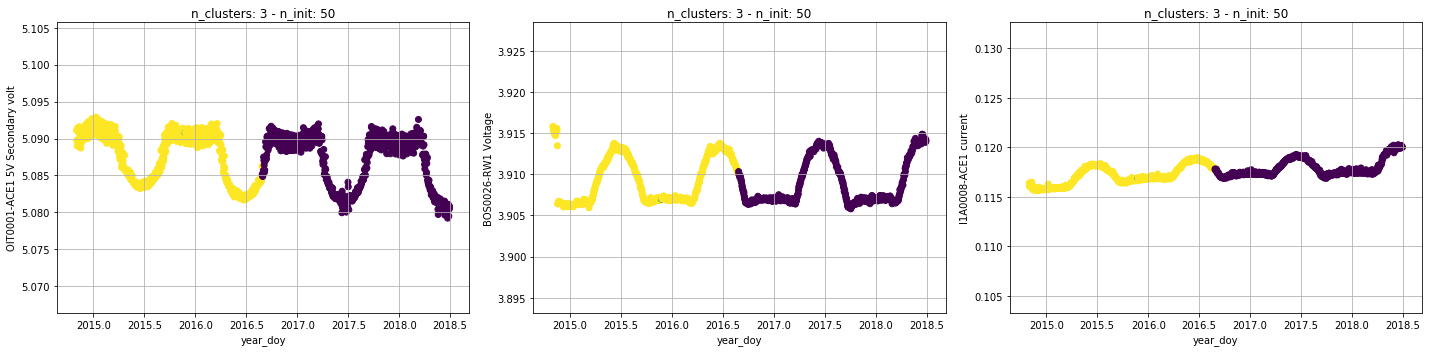

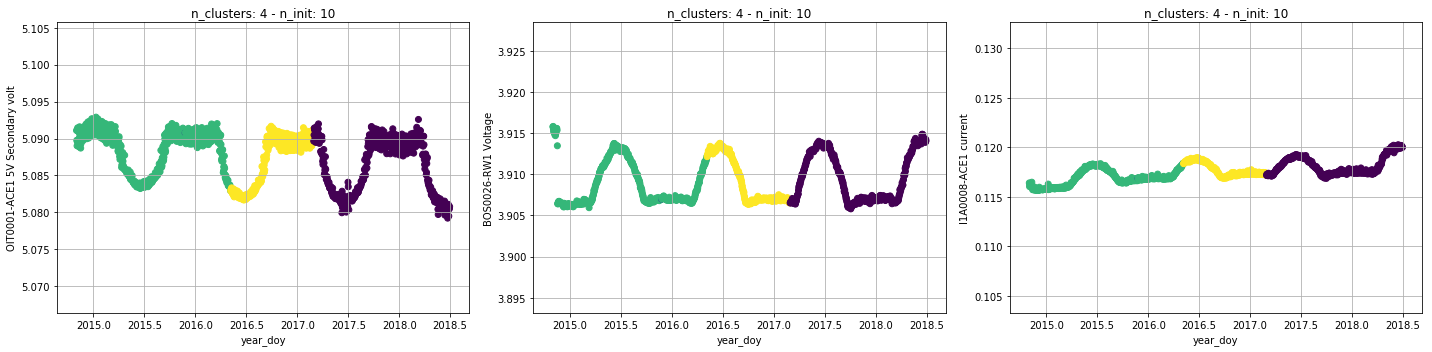

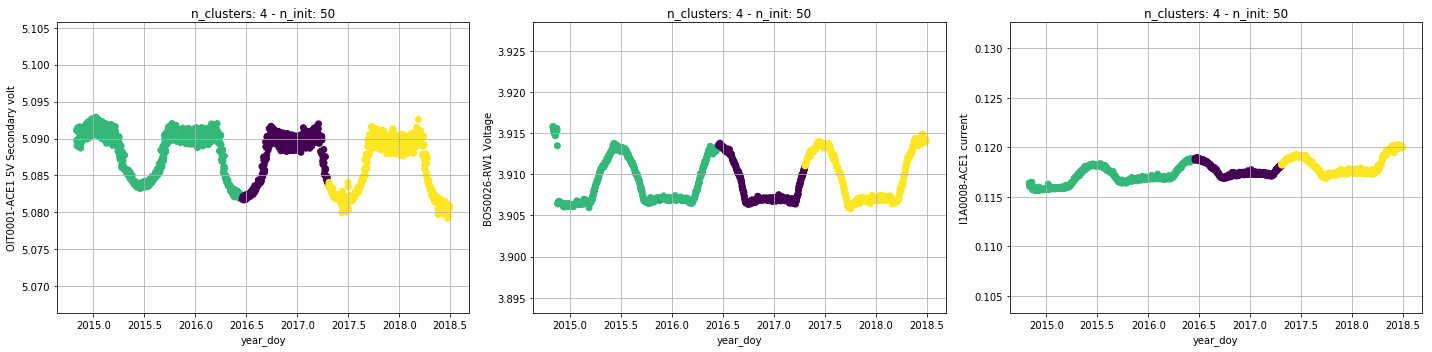

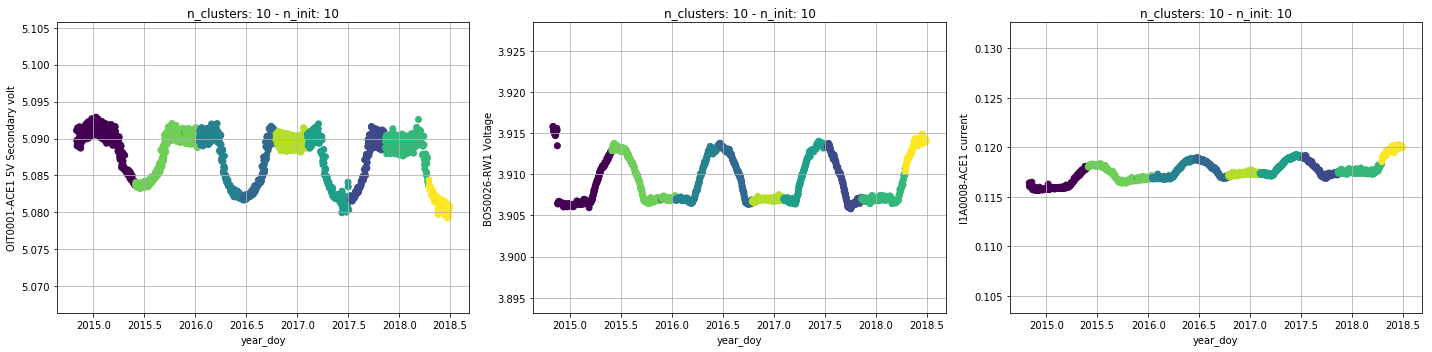

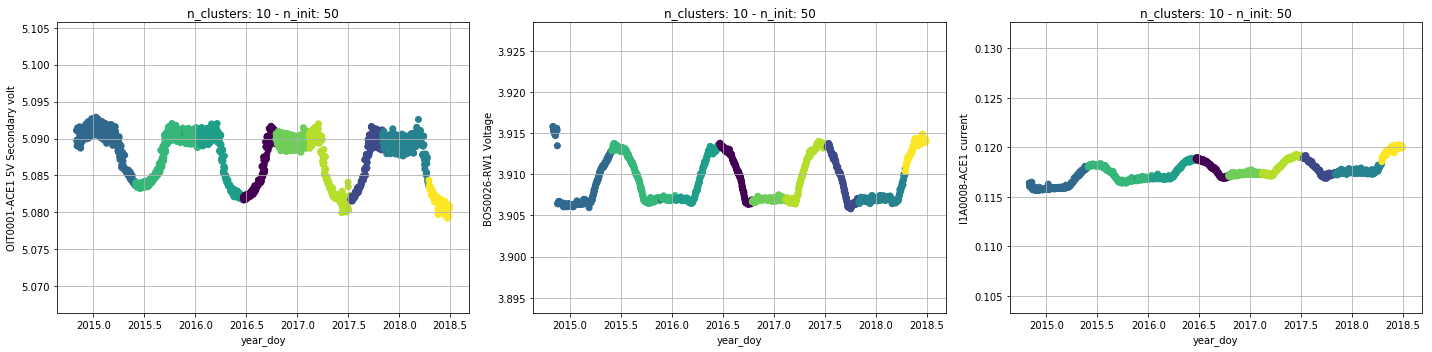

In [7]:
x_case='year_doy'
n_init=[10,50]
for  cl in cl_num:
    stat_dict[cl]={}
    for n in n_init:
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(sat.loc[:,var_int])
        stat_dict[cl].update({n:km.cluster_centers_.ravel()})
        y=km.predict(sat.loc[:,var_int])
        fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
        for yi,axj in zip(y_case,ax):
            axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n))
            axj.scatter(sat[x_case],sat[yi],c=y)
            axj.set_xlabel(x_case)
            axj.set_ylabel(yi+'-'+sat_names[yi])
            axj.grid(True)
        plt.tight_layout()

Graficados en funcion del DOY

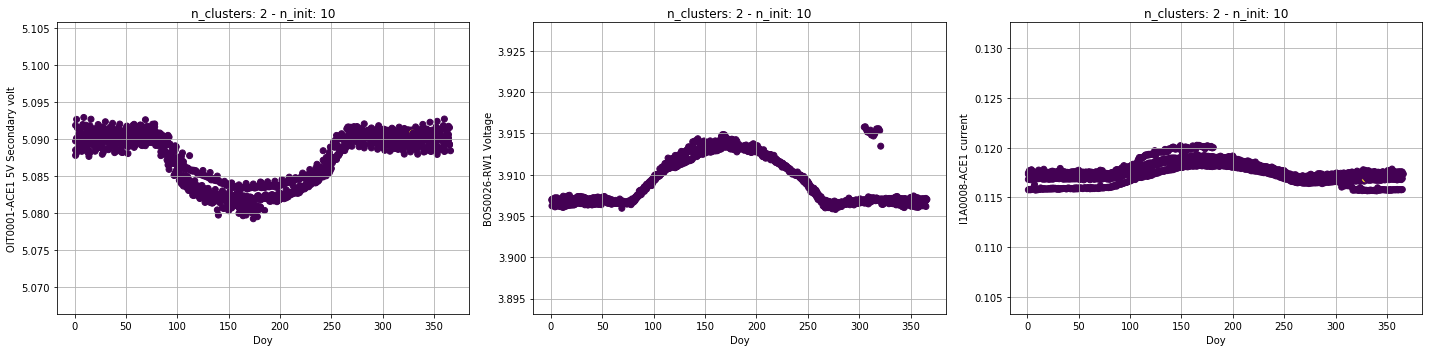

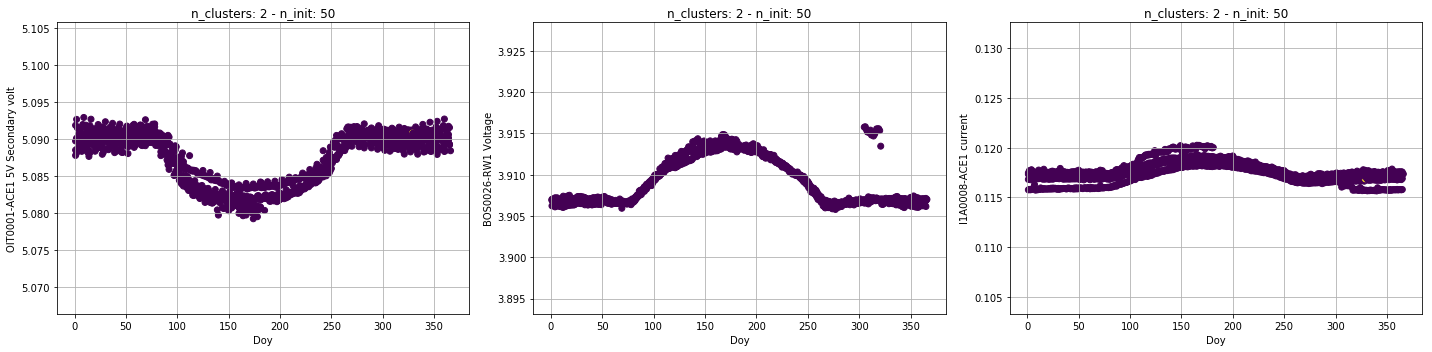

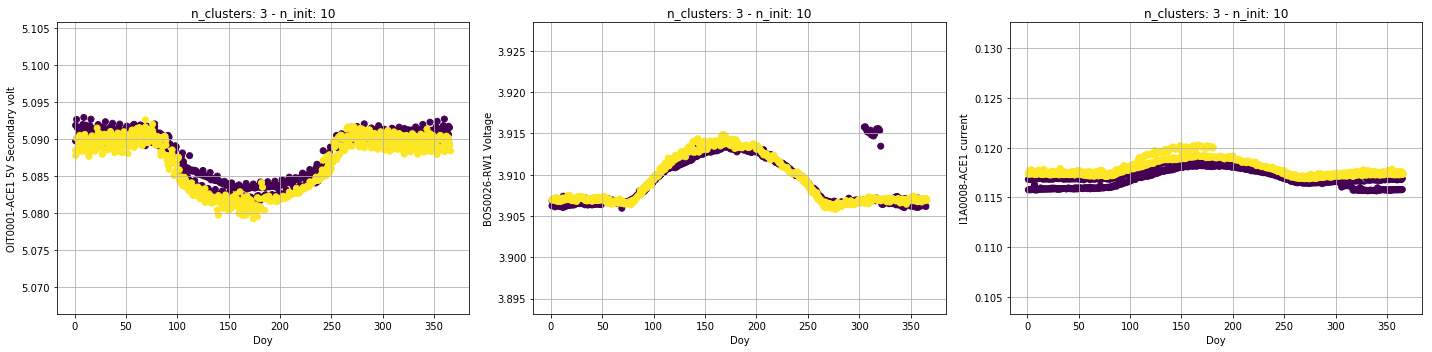

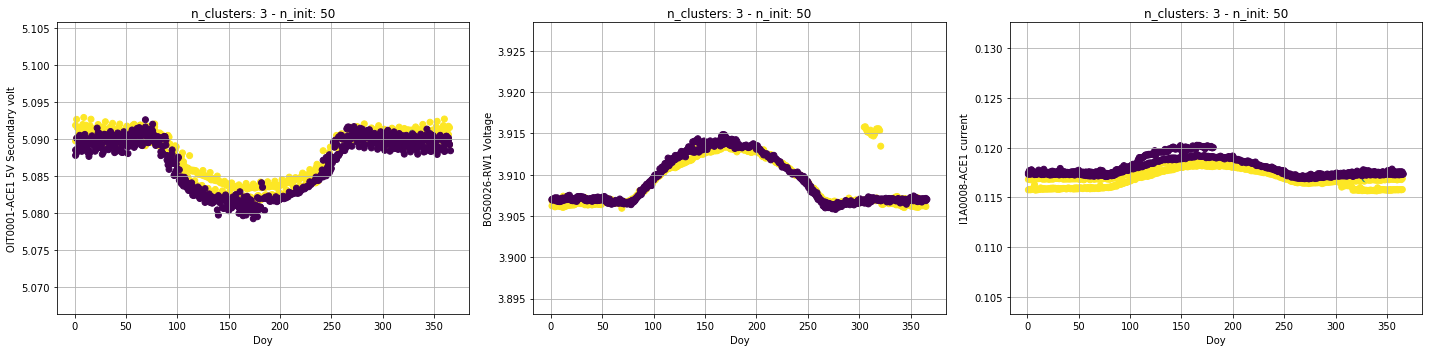

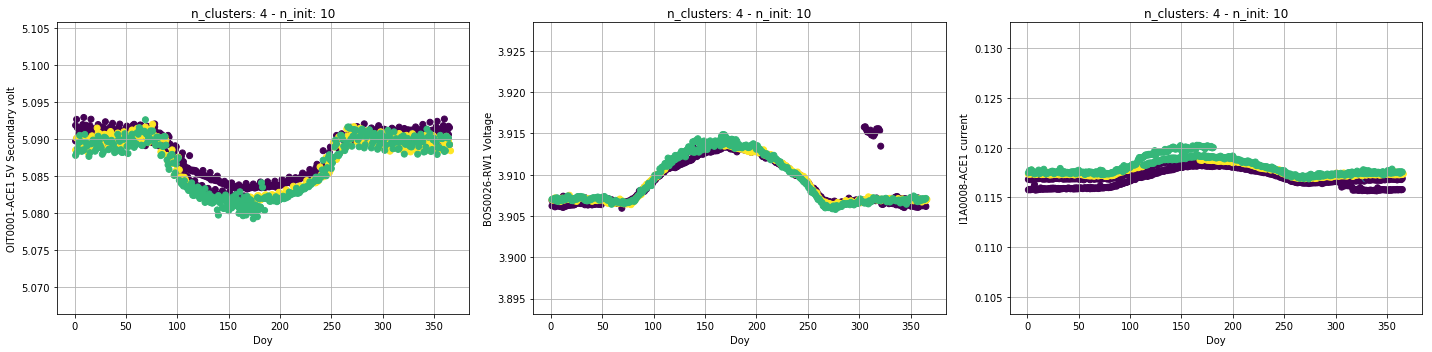

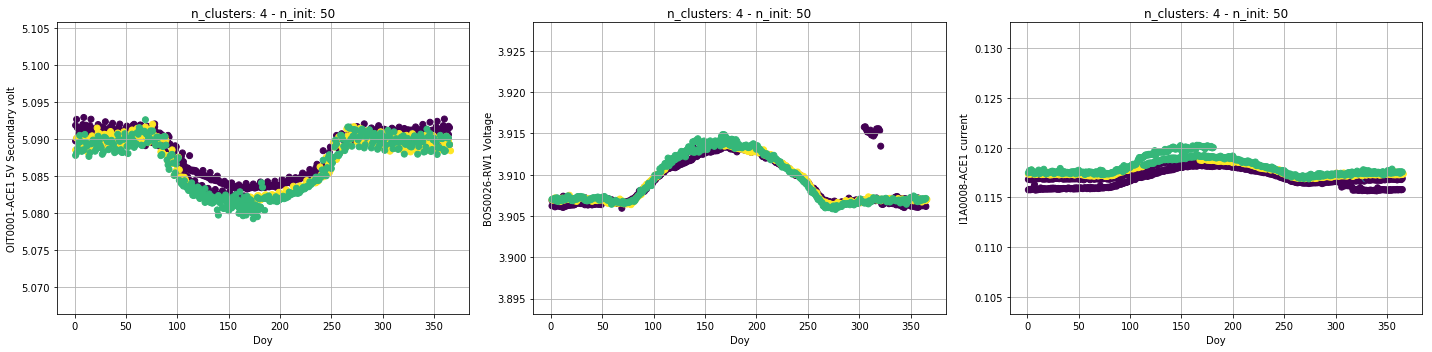

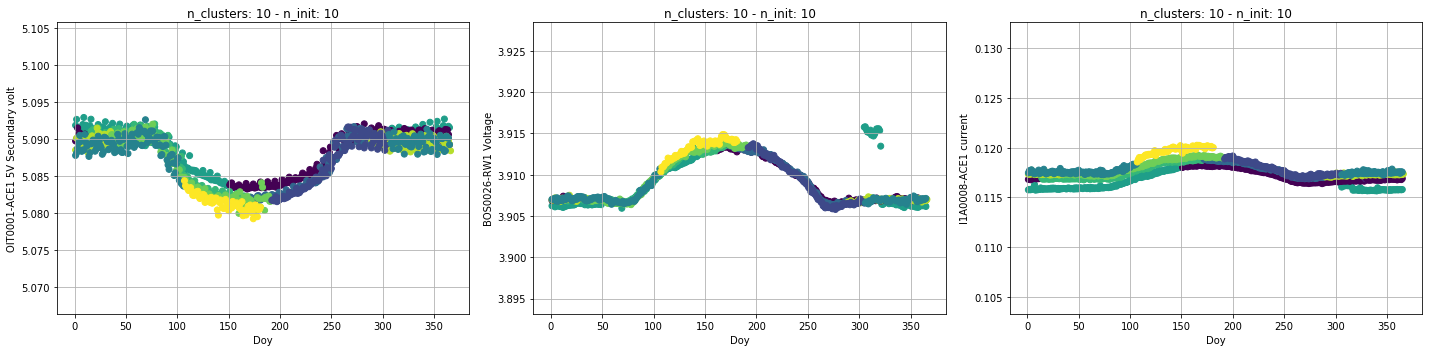

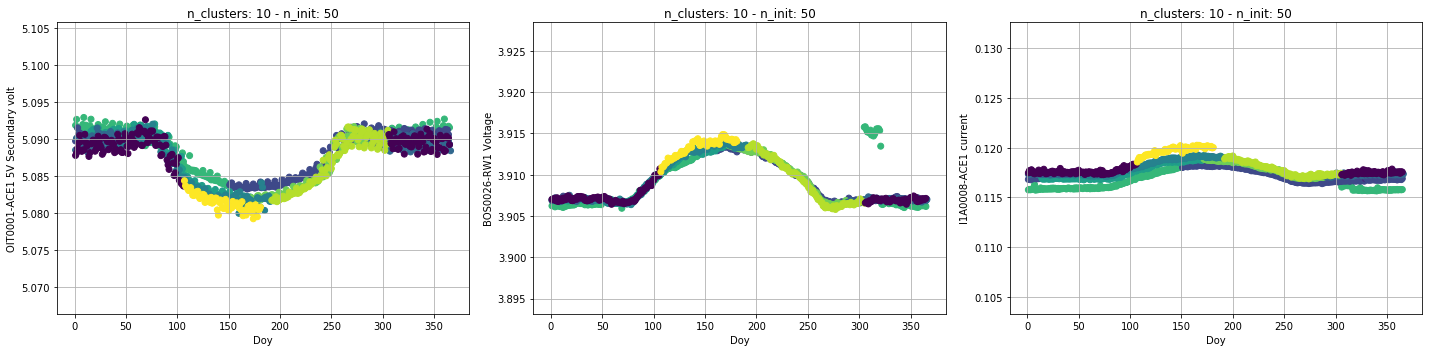

In [8]:
x_case='Doy'
n_init=[10,50]
for  cl in cl_num:
    for n in n_init:
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(sat.loc[:,var_int])
        stat_dict[cl].update({n:km.cluster_centers_.ravel()})
        y=km.predict(sat.loc[:,var_int])
        fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
        for yi,axj in zip(y_case,ax):
            axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n))
            axj.scatter(sat[x_case],sat[yi],c=y)
            axj.set_xlabel(x_case)
            axj.set_ylabel(yi+'-'+sat_names[yi])
            axj.grid(True)
        plt.tight_layout()

#### Comentarios

En relacion a las graficas anteriores y en funcion de lo que se grafique observamos que no se produce la acumulacion en lo que habiamos pensado clusters=(2,3,4) sino en valores mayores. Inclusive si observamos los valores en funcion del DOY parece acumular valores similares en clusters diferentes. Esto en si mismo no esta mal, puesto que le exigimos al sistema que genere un cierta cantidad de clusters. La separacion puede haber resultado no como esperabamos en funcion del set para fittear que le dimos a KMeans.
Igualmente por la clase de variables involucradas las fronteras de definicion (para lo que quiere clasificar) entre clusters es difusa y no se pretende  una segmentacion perfecta.
Adicionalmente la conformacion de los clusters no parece cambiar en terminos de n_init

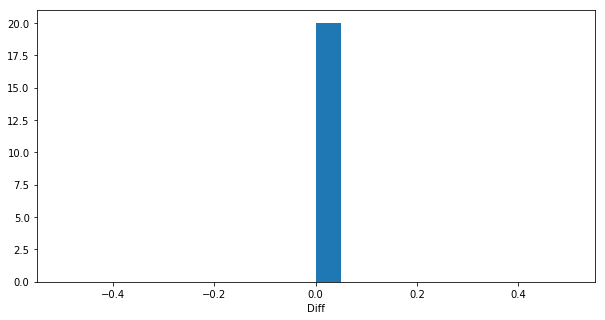

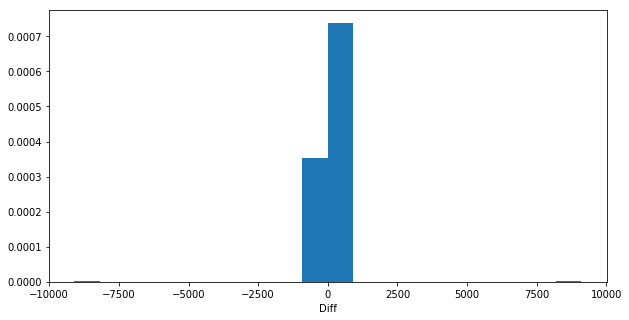

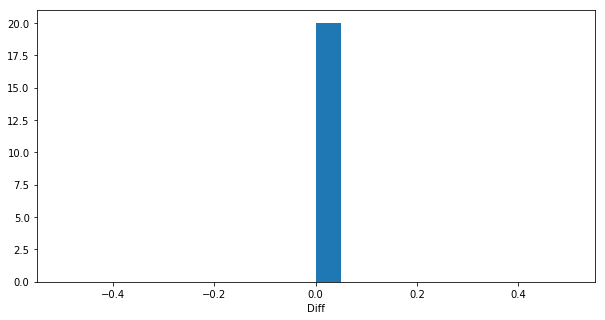

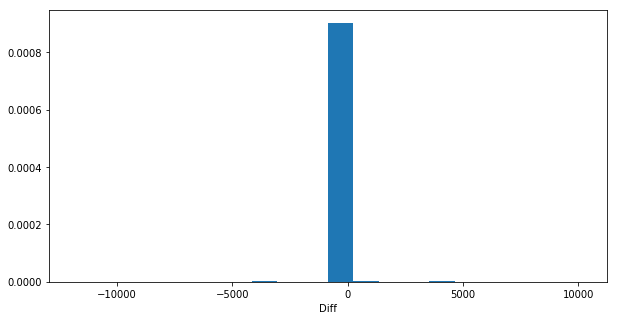

In [9]:
#Por ejemplo veamos las diferencias 
pd_stat=pd.DataFrame(stat_dict)
for x in pd_stat.columns:
    plt.figure(figsize=(10,5))
    plt.hist((pd_stat[x][10]-pd_stat[x][50]),bins=20,normed=True)
    plt.xlabel('Diff')
# En general las diferencias se mantiene acotadas

#### Clustering con un Set Reducido (y sin DOY/%Year/year_doy)
Veamos el efecto de efectuar KMeans en el set reducido.

In [10]:
# Clusters
cl_num=[2,3,4,10]
y_case=['OIT0001','BOS0026','I1A0008']
var_int=['OIT0001','OIT0002','OIT0003','BOS0026','BOS0027','BOS0030','BOS0031','BOS0034','BOS0035','BOS0038','BOS0039']
stat_dict_red={}

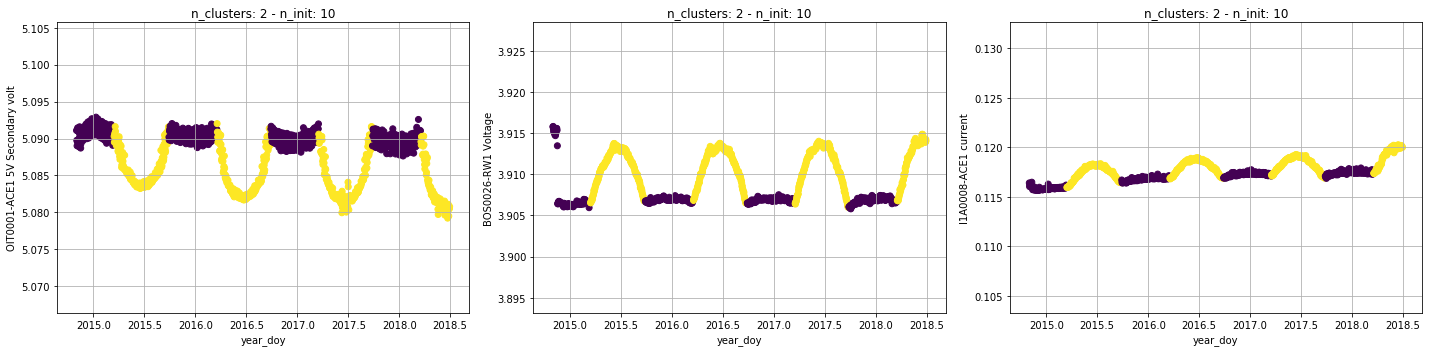

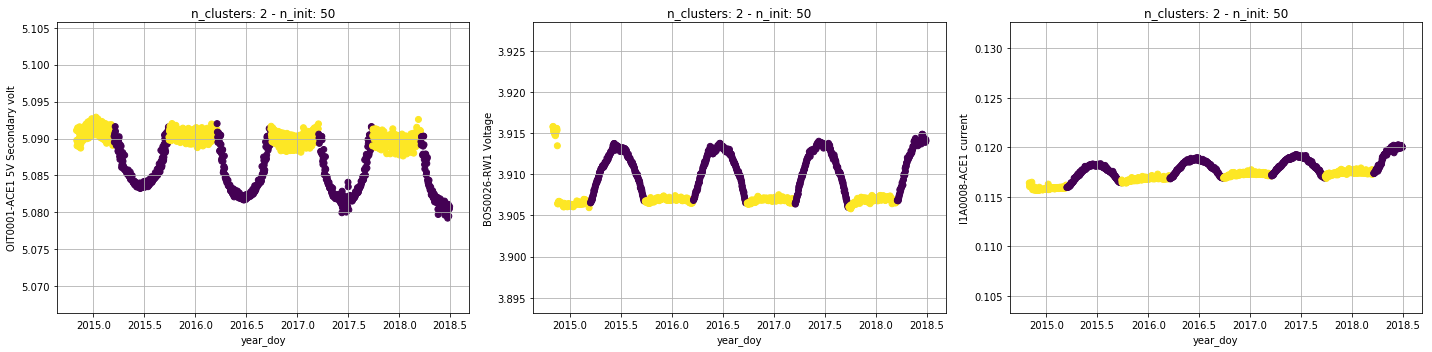

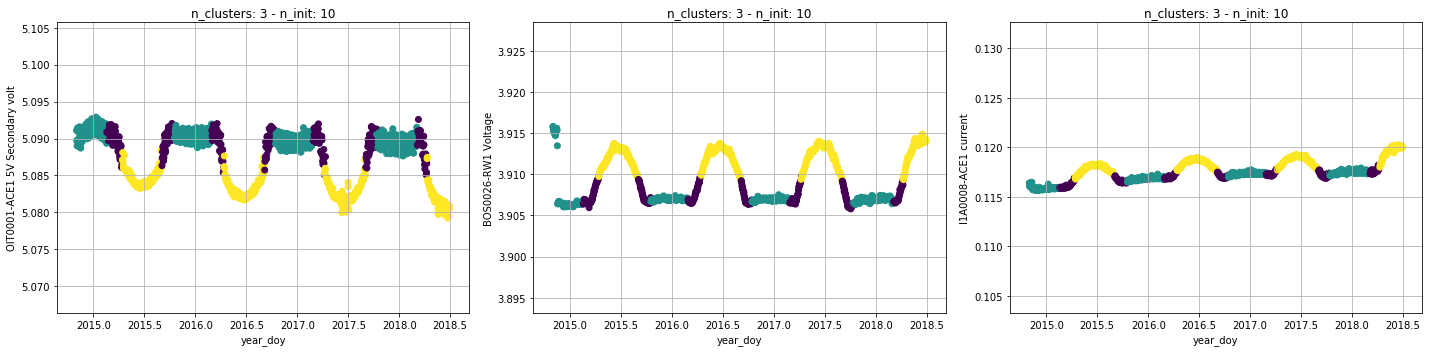

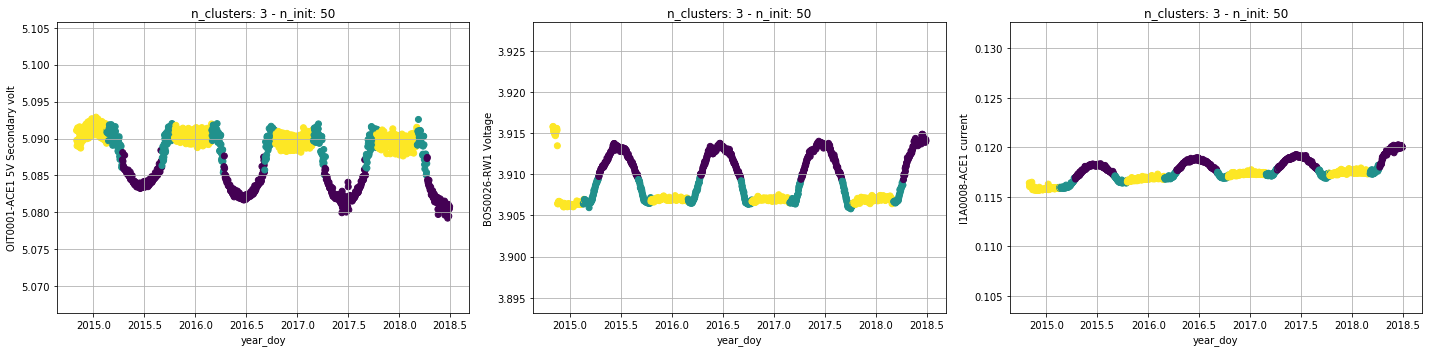

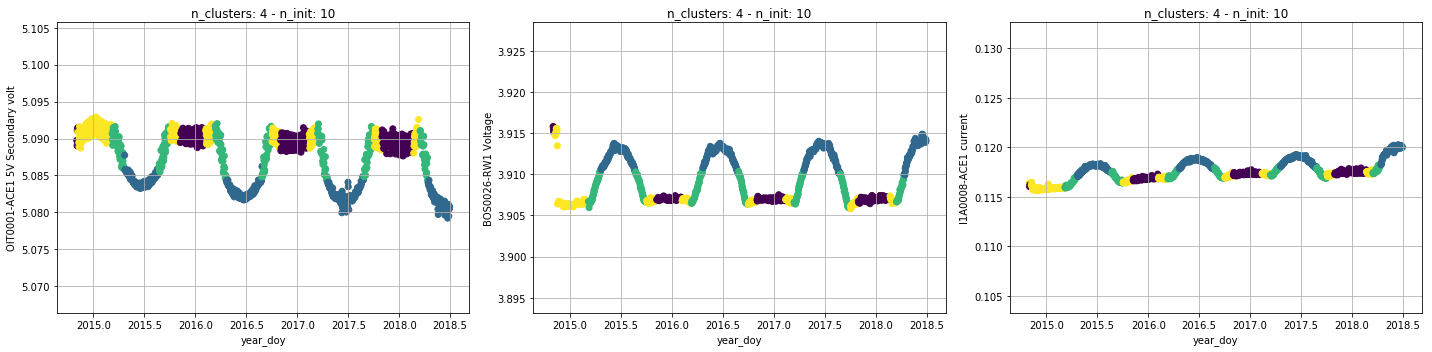

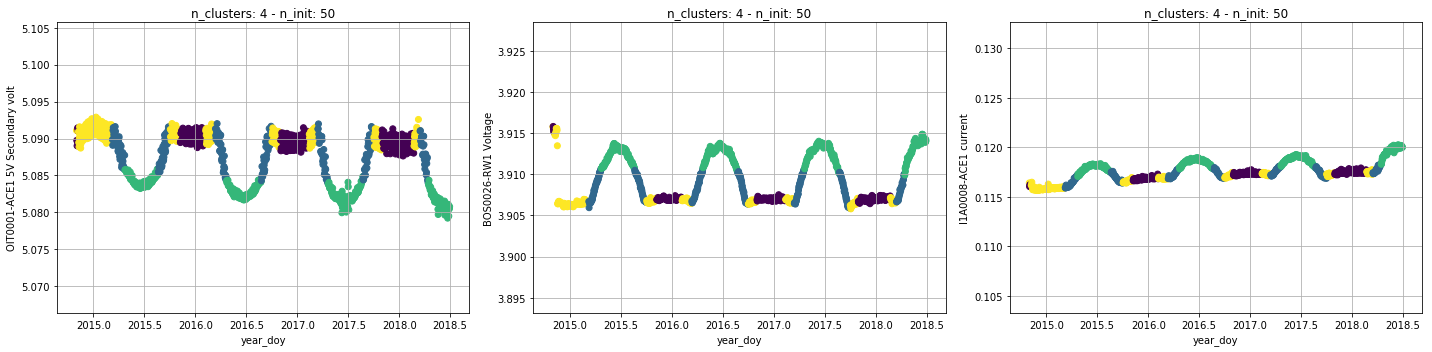

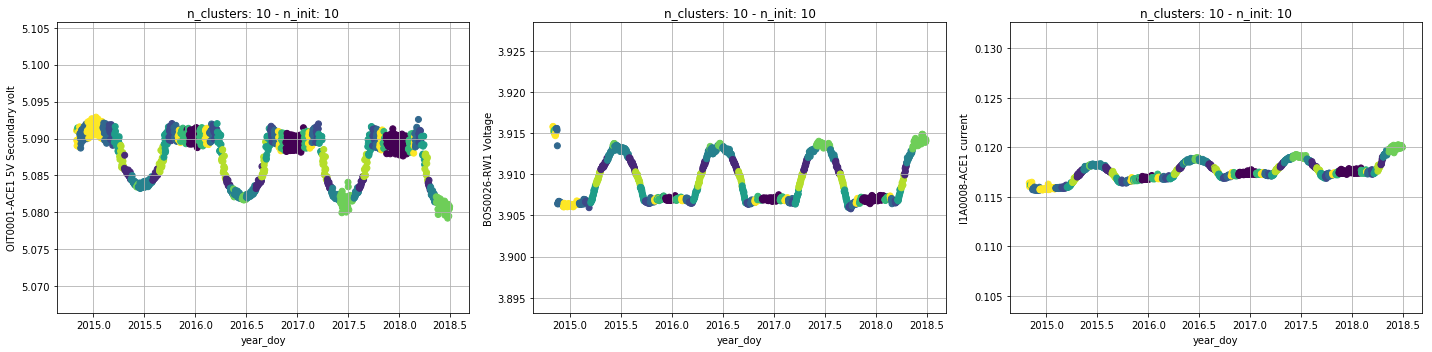

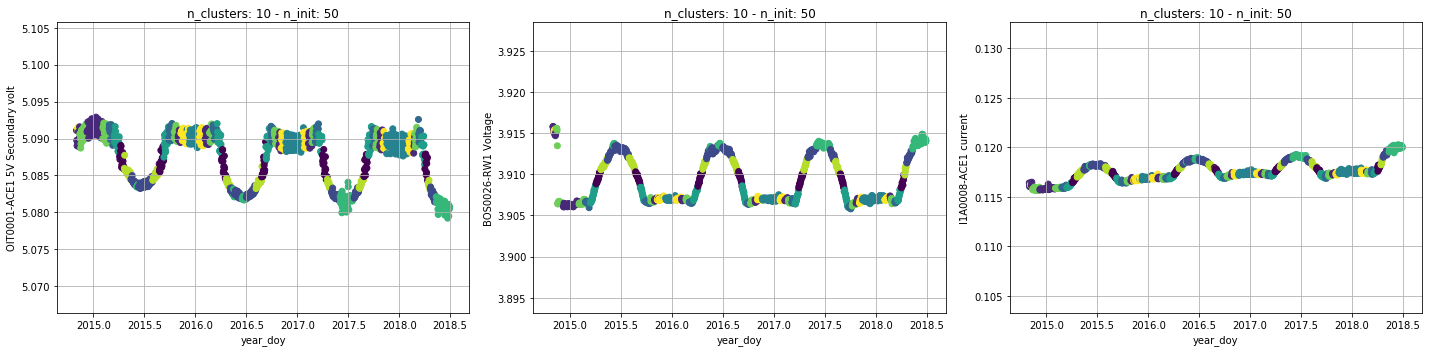

In [11]:
x_case='year_doy'
n_init=[10,50]
for  cl in cl_num:
    stat_dict_red[cl]={}
    for n in n_init:
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(sat.loc[:,var_int])
        stat_dict_red[cl].update({n:km.cluster_centers_.ravel()})
        y=km.predict(sat.loc[:,var_int])
        fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
        for yi,axj in zip(y_case,ax):
            axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n))
            axj.scatter(sat[x_case],sat[yi],c=y)
            axj.set_xlabel(x_case)
            axj.set_ylabel(yi+'-'+sat_names[yi])
            axj.grid(True)
        plt.tight_layout()

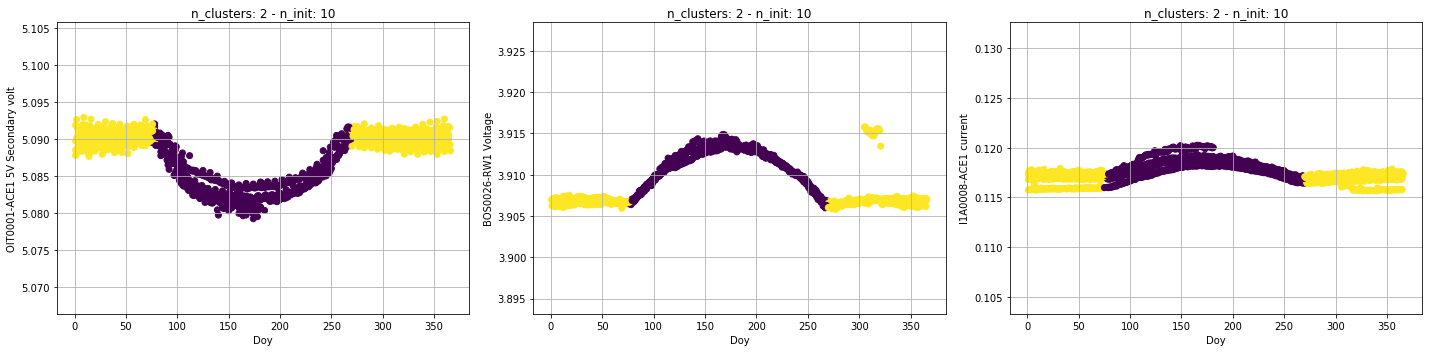

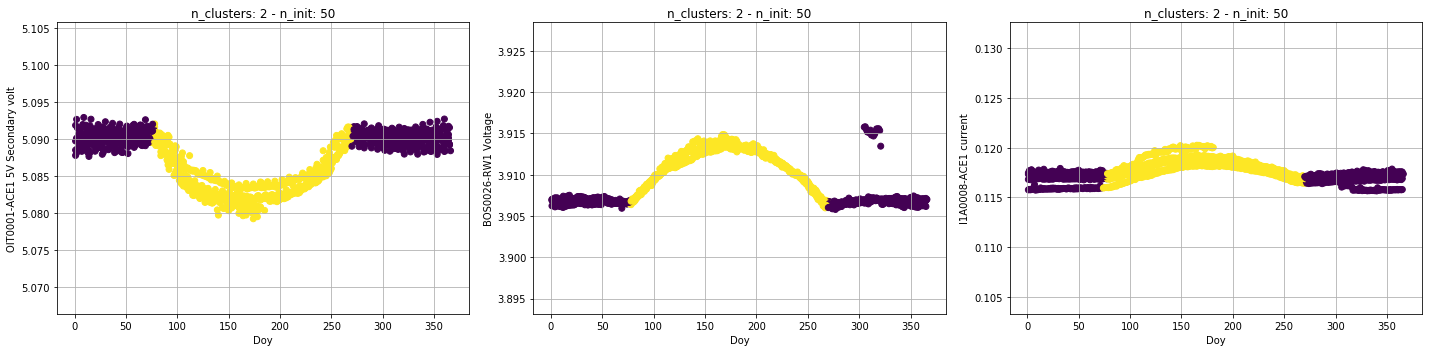

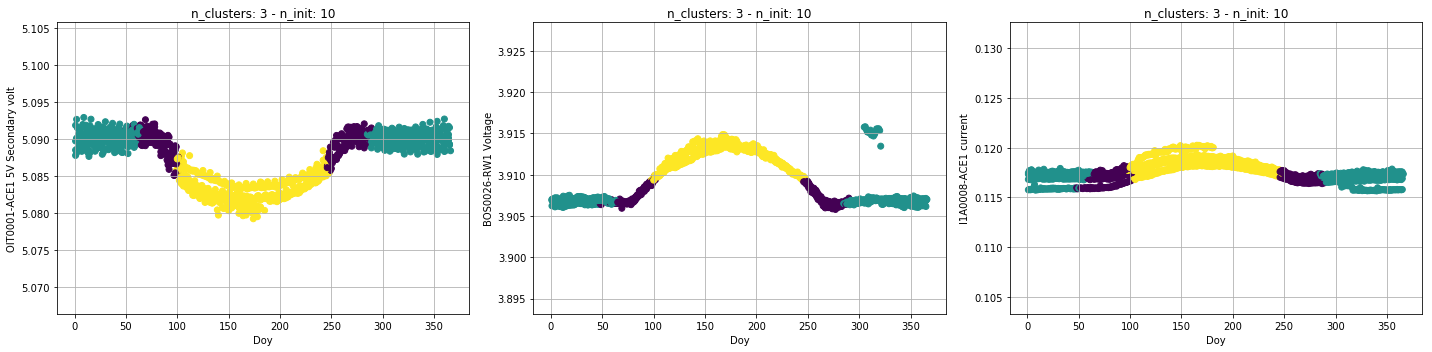

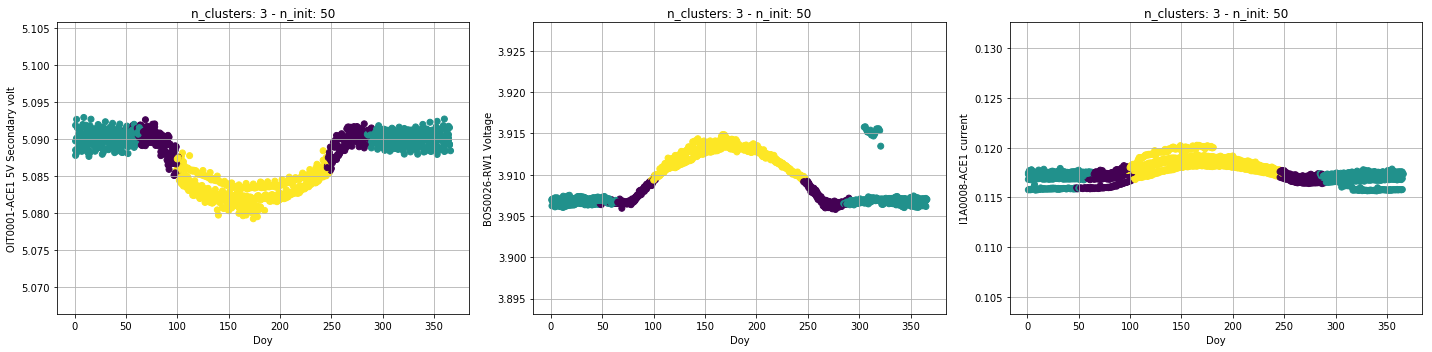

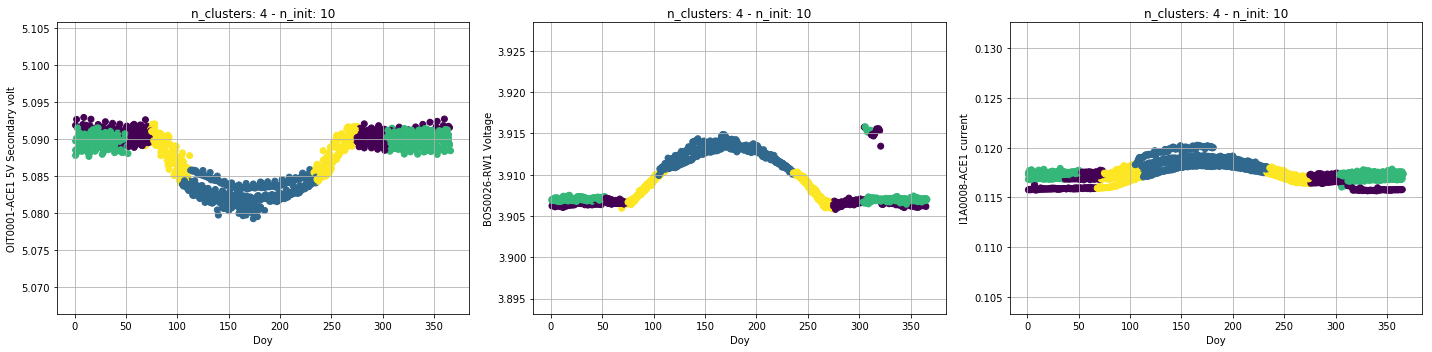

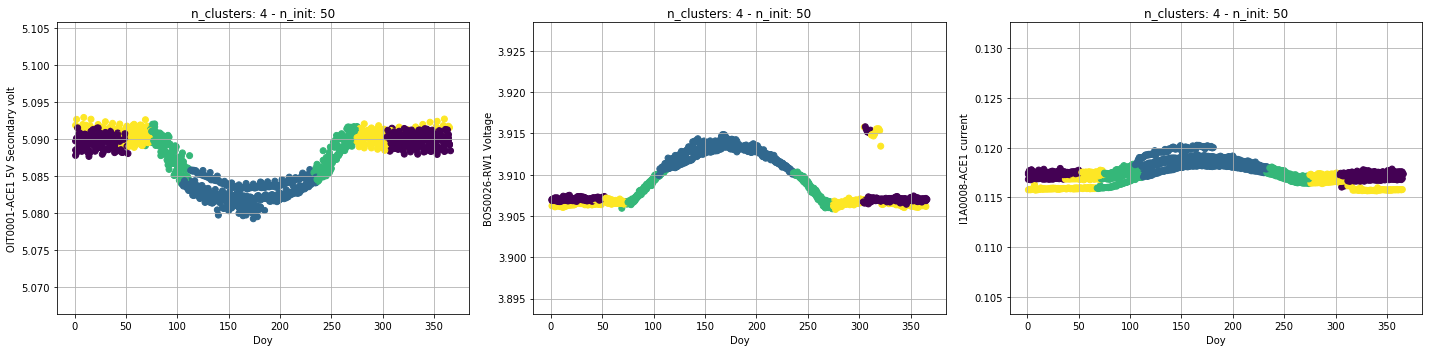

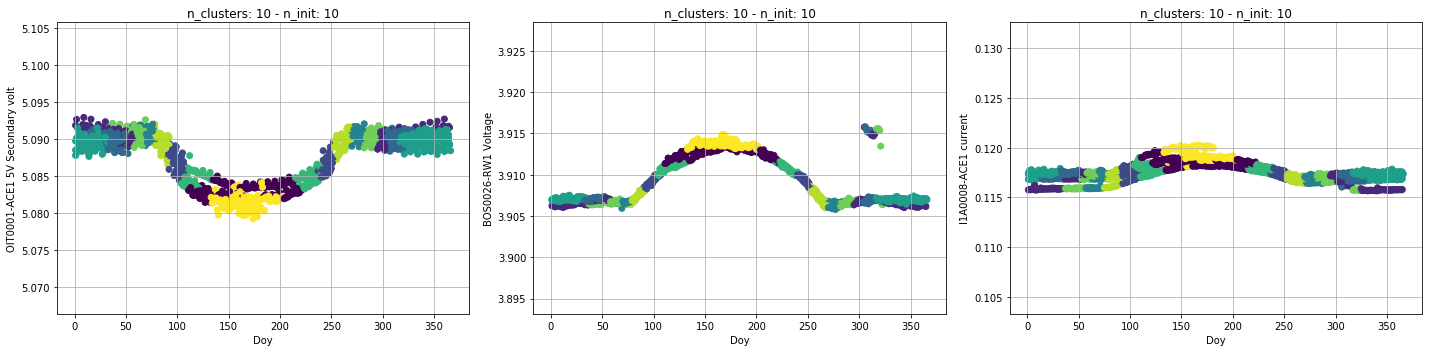

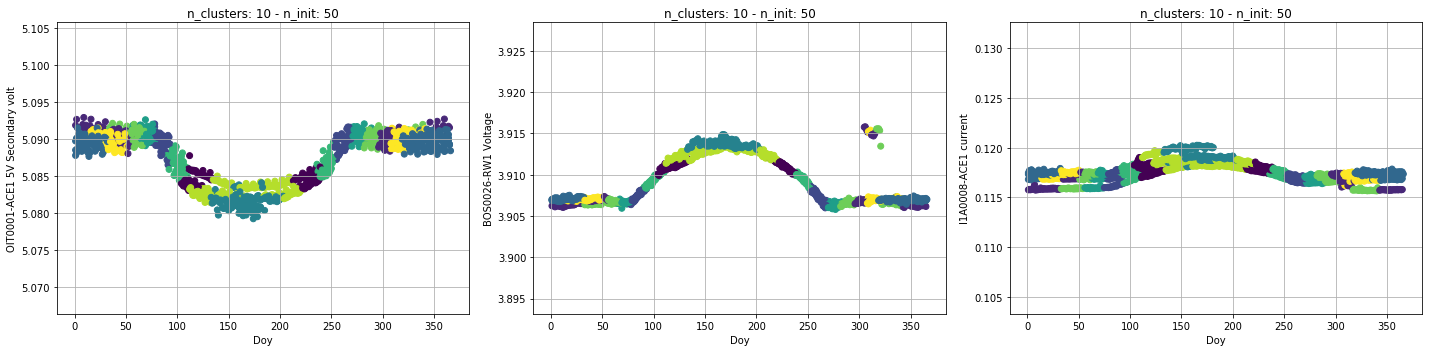

In [12]:
x_case='Doy'
n_init=[10,50]
for  cl in cl_num:
    for n in n_init:
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(sat.loc[:,var_int])
        y=km.predict(sat.loc[:,var_int])
        fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
        for yi,axj in zip(y_case,ax):
            axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n))
            axj.scatter(sat[x_case],sat[yi],c=y)
            axj.set_xlabel(x_case)
            axj.set_ylabel(yi+'-'+sat_names[yi])
            axj.grid(True)
        plt.tight_layout()

#### Comentarios

En relacion a las graficas anteriores y en funcion de lo que se grafique observamos que en el presente set reducido se produce una separacion al estilo de lo que habiamos planteado inicialmente (n_cluster=(2,3,4)). Para n=2 ya se reconoce cierta estacionalidad (al menos los extremos). Para n=3 se reconocen las estaciones extremas (verano/invierno) pero no las de cambio (primavera/otoño), estas ultimas aparecen como un solo cluster (esto queda mas claro al observar los graficos en terminos de year_doy). Para n=4 introducimos un nuevo cluster, pero sigue sin diferenciar estacionalidad, sino que por la naturaleza de los datos empieza a pisar uno de los clusters ya establecidos.
Nuevamente esto en si mismo no esta mal, puesto que le exigimos al sistema que genere un cierta cantidad de clusters. La separacion puede haber resultado no como esperabamos en funcion del set para fittear que le dimos a KMeans.
Igualmente por la clase de variables involucradas las fronteras de definicion (para lo que quiere clasificar) entre clusters es difusa y no se pretende  una segmentacion perfecta.
Adicionalmente la conformacion de los clusters no parece cambiar en terminos de n_init

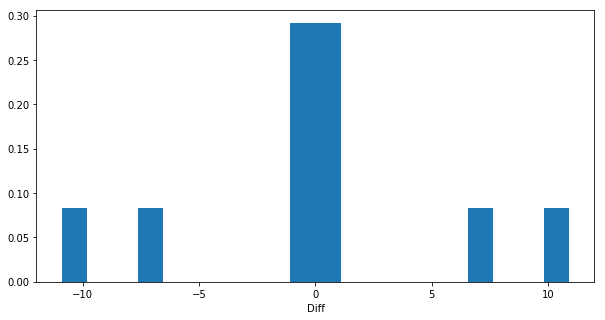

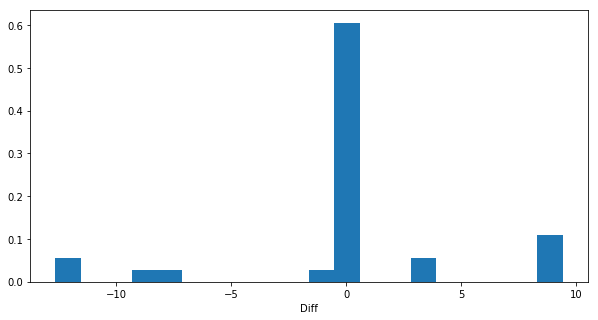

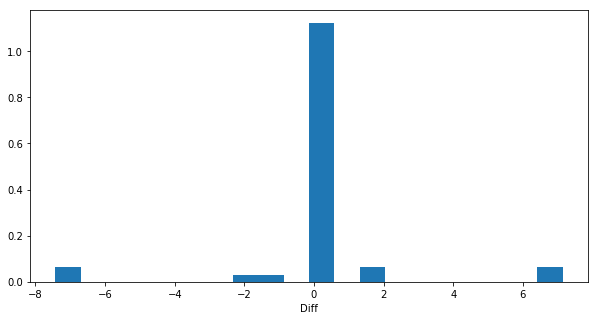

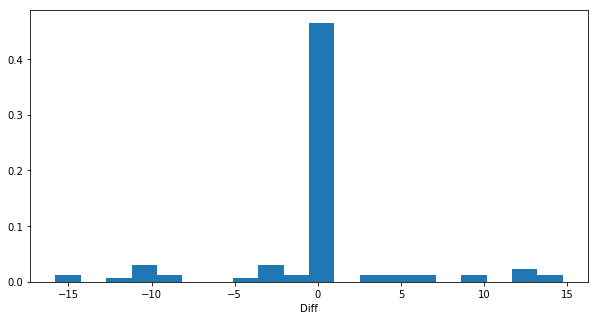

In [13]:
#Por ejemplo veamos las diferencias 
pd_stat=pd.DataFrame(stat_dict_red)
for x in pd_stat.columns:
    plt.figure(figsize=(10,5))
    plt.hist((pd_stat[x][10]-pd_stat[x][50]),bins=20,normed=True)
    plt.xlabel('Diff')
# En general las diferencias se mantiene acotadas y son menores a las reportadas con el set completo de entrenamiento. Aunque esto puede ser simplemente porque las variables consideradas tienden a agruparse en nucleos de menor varianza que el set completo.

## PCA

Ahora observamos haciendo un analisis PCA

In [14]:
from sklearn.decomposition import PCA 

### Set Completo

In [15]:
# PCA
n_components=2
pca=PCA(n_components=n_components)
# Clusters
cl_num=[2,3,4,10]
var_int=sat_list
stat_dict={}
X=sat.loc[:,var_int]
X_pca=pca.fit_transform(X)
y_case=np.arange(0,n_components)
print('Variance Ratio')
pca.explained_variance_ratio_

Variance Ratio


array([0.91465791, 0.08486734])

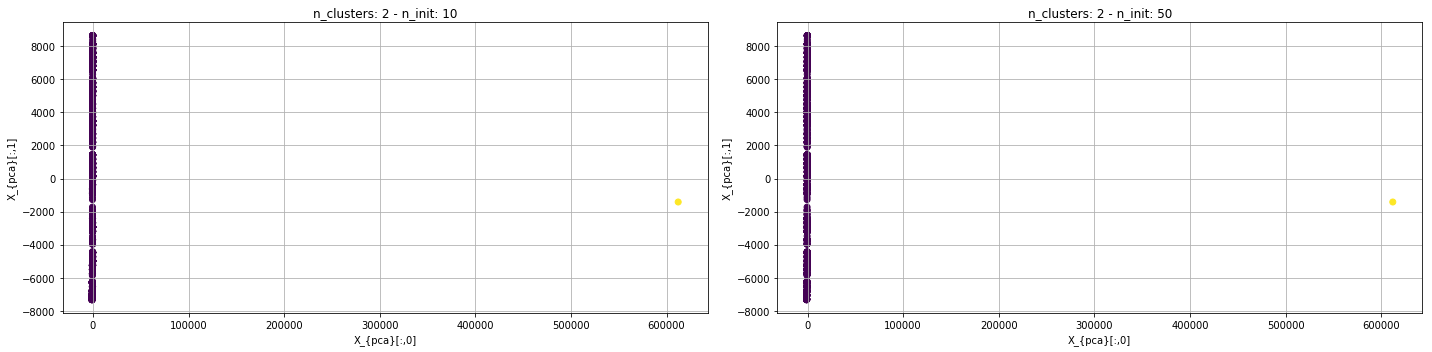

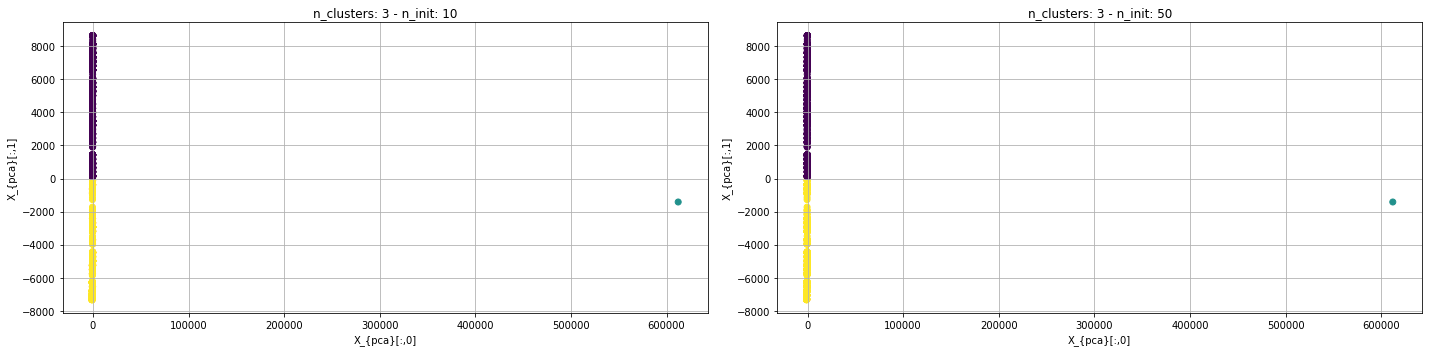

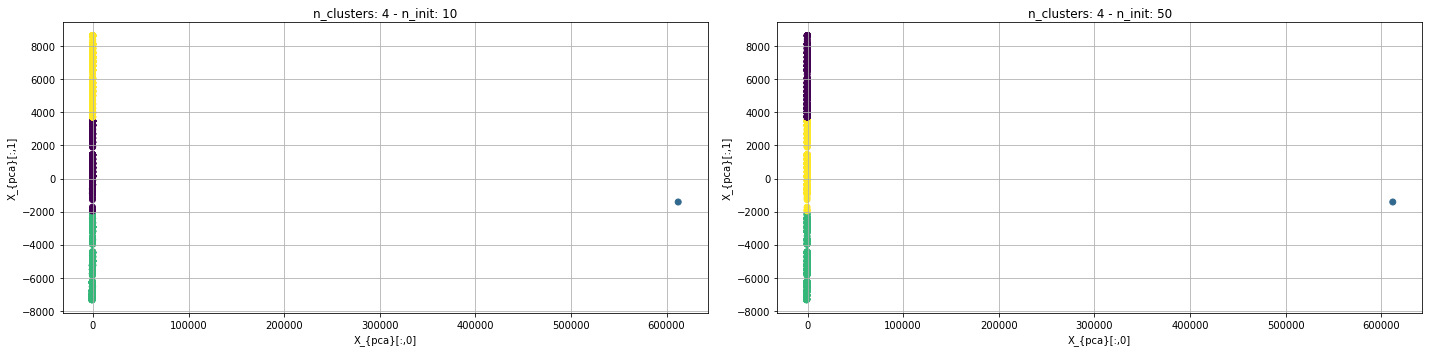

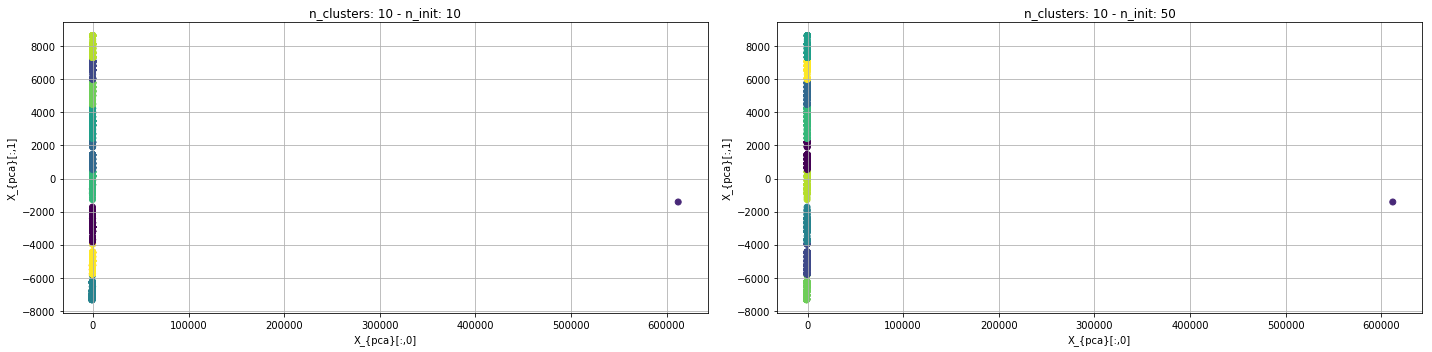

In [16]:
n_init=[10,50]
for  cl in cl_num:
    stat_dict[cl]={}
    fig, ax = plt.subplots(1,len(n_init),figsize=(20,5))
    for n,axj in zip(n_init,ax):
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(X_pca)
        y=km.predict(X_pca)
        axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n))
        axj.scatter(X_pca[:,0],X_pca[:,1],c=y)
        axj.set_xlabel('X_{pca}[:,0]')
        axj.set_ylabel('X_{pca}[:,1]')
        axj.grid(True)
    plt.tight_layout()

Observamos que una de las direcciones es la que lleva la mayor parte de la informacion. Sin embargo observamos el mismo problema que para el Set completo en el espacio directo (los cambios en la constitucion de los clusters empieza n>3)

### Set Reducido

In [17]:
# PCA
n_components=2
pca=PCA(n_components=n_components)
# Clusters
cl_num=[2,3,4,10]
var_int=['OIT0001','OIT0002','OIT0003','BOS0026','BOS0027','BOS0030','BOS0031','BOS0034','BOS0035','BOS0038','BOS0039']
X=sat.loc[:,var_int]
X_pca=pca.fit_transform(X)
y_case=np.arange(0,n_components)
print('Variance Ratio')
pca.explained_variance_ratio_

Variance Ratio


array([0.87273577, 0.12637628])

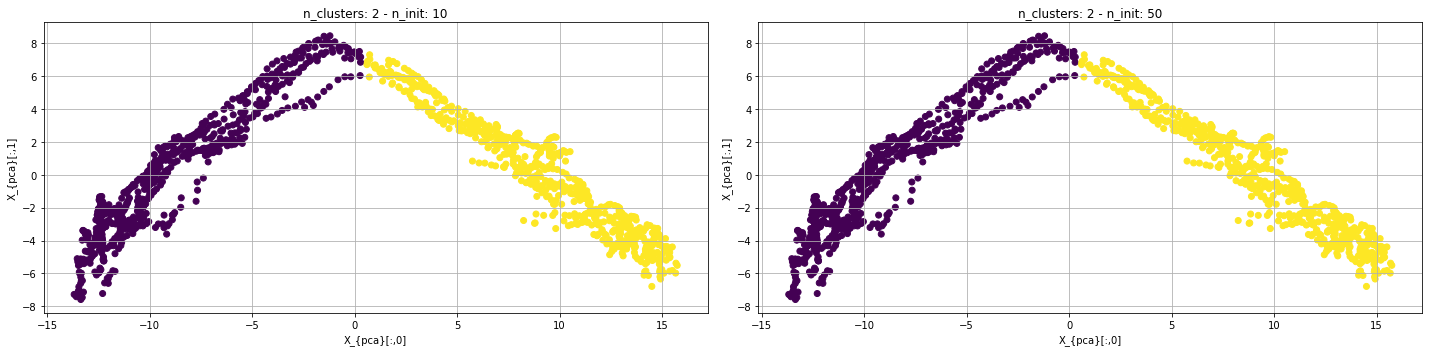

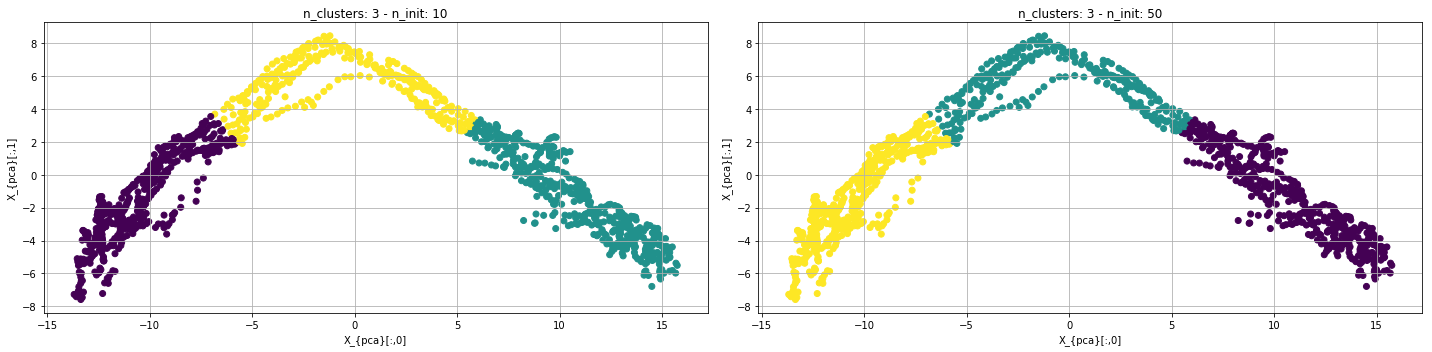

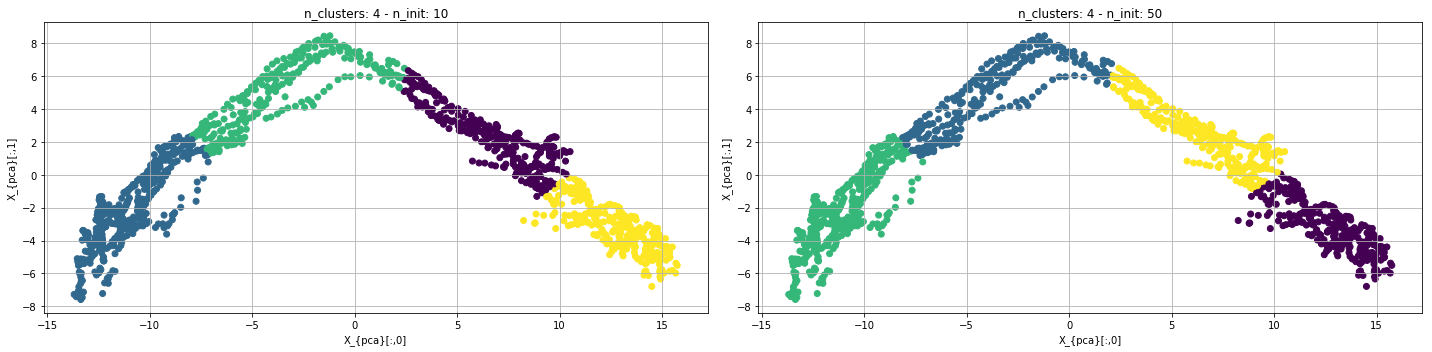

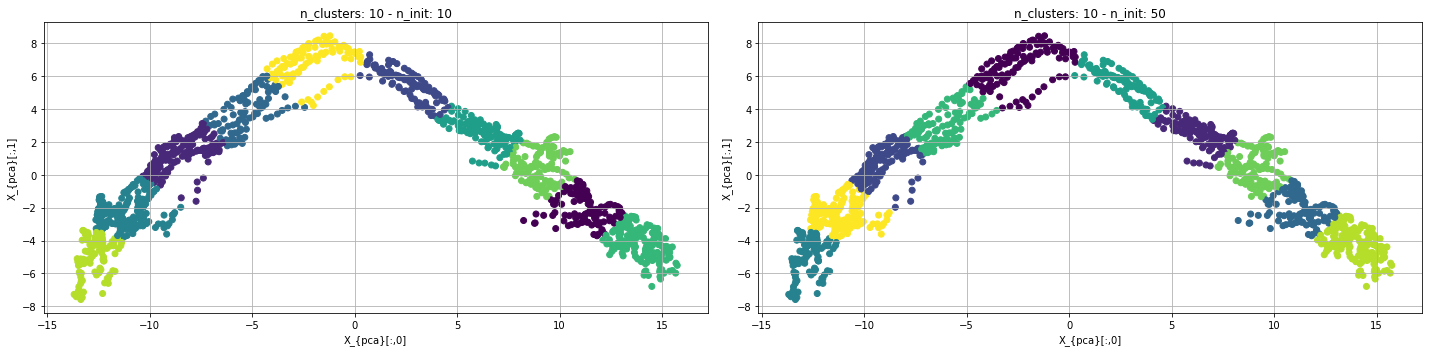

In [18]:
n_init=[10,50]
for  cl in cl_num:
    fig, ax = plt.subplots(1,len(n_init),figsize=(20,5))
    for n,axj in zip(n_init,ax):
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(X_pca)
        y=km.predict(X_pca)
        axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n))
        axj.scatter(X_pca[:,0],X_pca[:,1],c=y)
        axj.set_xlabel('X_{pca}[:,0]')
        axj.set_ylabel('X_{pca}[:,1]')
        axj.grid(True)
    plt.tight_layout()

En el set reducido una de las direcciones principales sigue siendo importante sin embargo una segunda dimension tambien constribuye significativamente a la varianza de los datos. En este caso y en forma similar a los datos en el espacio directo tambien se observa la separacion ya en n=2.

In [19]:
# PCA
n_components=3
pca=PCA(n_components=n_components)
# Clusters
cl_num=[2,3,4,10]
var_int=['OIT0001','OIT0002','OIT0003','BOS0026','BOS0027','BOS0030','BOS0031','BOS0034','BOS0035','BOS0038','BOS0039']
stat_dict={}
X=sat.loc[:,var_int]
X_pca=pca.fit_transform(X)
y_case=np.arange(0,n_components)
print('Variance Ratio')
pca.explained_variance_ratio_

Variance Ratio


array([8.72735772e-01, 1.26376276e-01, 7.65680708e-04])

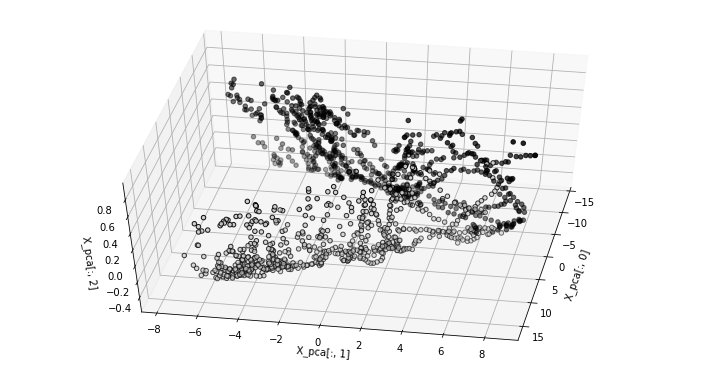

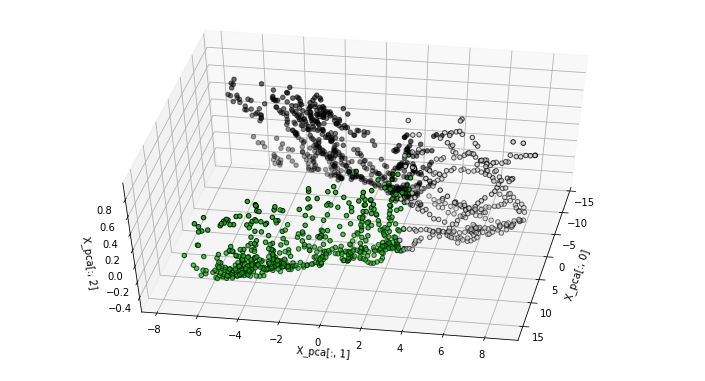

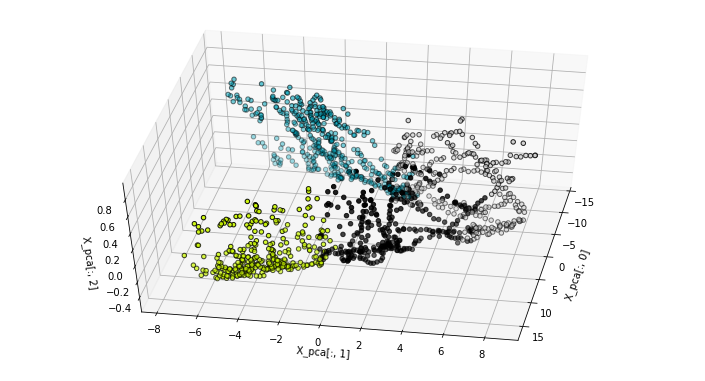

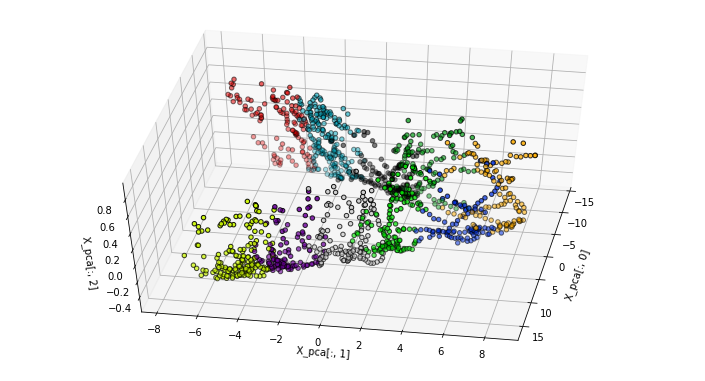

In [20]:
from mpl_toolkits.mplot3d import Axes3D

for  cl in cl_num:
    fig = plt.figure(1, figsize=(10, 5))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50, azim=10)
    km=KMeans(n_clusters=cl,n_init=n)
    km.fit(X_pca)
    y=km.predict(X_pca)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.nipy_spectral,edgecolor='k')
    ax.set_xlabel('X_pca[:, 0]')
    ax.set_ylabel('X_pca[:, 1]')
    ax.set_zlabel('X_pca[:, 2]')
    plt.show()



Vemos que el peso de la tercera componente (ademas de la varianza) parece despreciable puesto que ningun cluster parece  formarse utilizando esa dimension.

#### Objetos mas cercanos

*El método k-means de scikit-learn no provee una forma sencilla de obtener los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.*

Podriamos elegir aquellos elementos que en terminos de distancia euclidia esten dentro de un cierto radio. Es decir si
$\vec{x}=(x_1,x_2,\ldots,x_n)$ y $\vec{c}_j(c_1,c_2,\ldots,c_n)$ son un punto en cuestion y un dado centroide, podria considerar que el mismo pertenece al set si $|\vec{x}-\vec{c}_j|<\epsilon$. Una alternativa seria poner, si quisieramos pesar mas una solucion en particular, cotas puntuales. Es decir,
dada una componente $x_k$ de un vector $\vec{x}$, pedir que $\frac{|x_k-c_k|}{|c_k|}<\epsilon_k$. 
Se podria tambien utilizar el producto punto (entre los versores directores) y definir alguna cota en terminos de angulo (algo al estilo de distancia coseno $\vec{x_1}\cdot\vec{x_2}=|\vec{x_1}||\vec{x_2}|cos(\hat{\vec{x_1}\vec{x_2}})$)

Trabajamos con el set reducido

In [21]:
# Clusters
cl_num=[2,3,4,10]
y_case=['OIT0001','BOS0026','I1A0008']
var_int=['OIT0001','OIT0002','OIT0003','BOS0026','BOS0027','BOS0030','BOS0031','BOS0034','BOS0035','BOS0038','BOS0039']
stat_dict_red={}

In [22]:
# Vemos un caso puntual
km=KMeans(n_clusters=2,n_init=10)
km.fit(sat.loc[:,var_int])
X=sat.loc[:,var_int]
y=km.predict(X)
# Computamos la pertenencia de acuerdo a los constraints impuestos
pd_ci,_=get_nearest_cent_mbound(X,[0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4],km.cluster_centers_)
pd_cos,_=get_nearest_cent_cosine(X,0.1,km.cluster_centers_)

0    667
1    416
3    255
Name: merge, dtype: int64


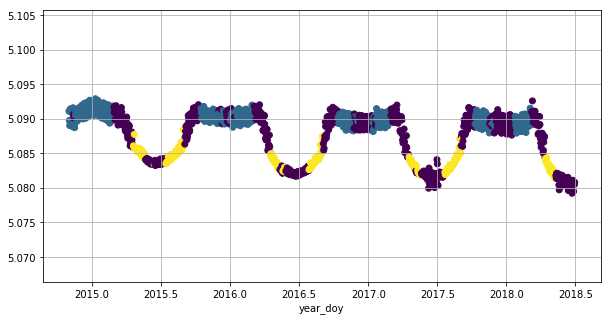

In [23]:
print(pd_ci['merge'].value_counts())
x_case='year_doy'
plt.figure(figsize=(10,5))
plt.scatter(sat[x_case],sat['OIT0001'],c=pd_ci['merge'])
plt.grid(True)
plt.xlabel(x_case);

3    488
1    469
0    381
Name: merge, dtype: int64


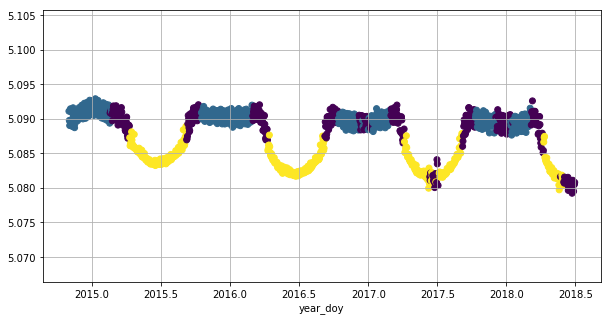

In [24]:
print(pd_cos['merge'].value_counts())
x_case='year_doy'
plt.figure(figsize=(10,5))
plt.scatter(sat[x_case],sat['OIT0001'],c=pd_cos['merge'])
plt.grid(True)
plt.xlabel(x_case);

#### Comentarios

Vemos que con las cotas usadas, el seleccionador dejo sin asignar un cierto numero de casos. Los identificados por 0 no corresponden a ninguno de los 
casos, y los impares corresponden a los pertenecientes a cada "cluster". Los pares corresponden a "colisiones" es decir aquellos puntos que segun  las condiciones impuestas podrian pertenecer a cualquier de los clusters constituyentes (en revision este formato...).


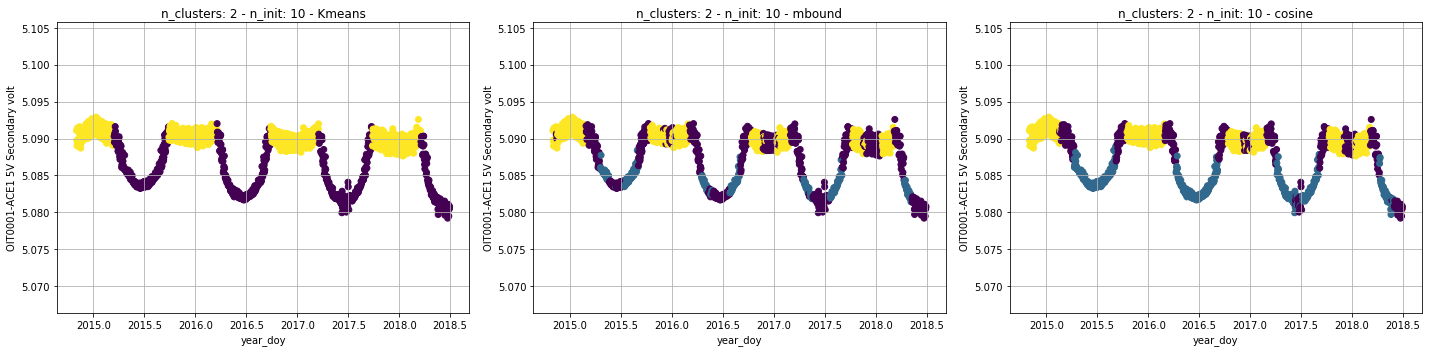

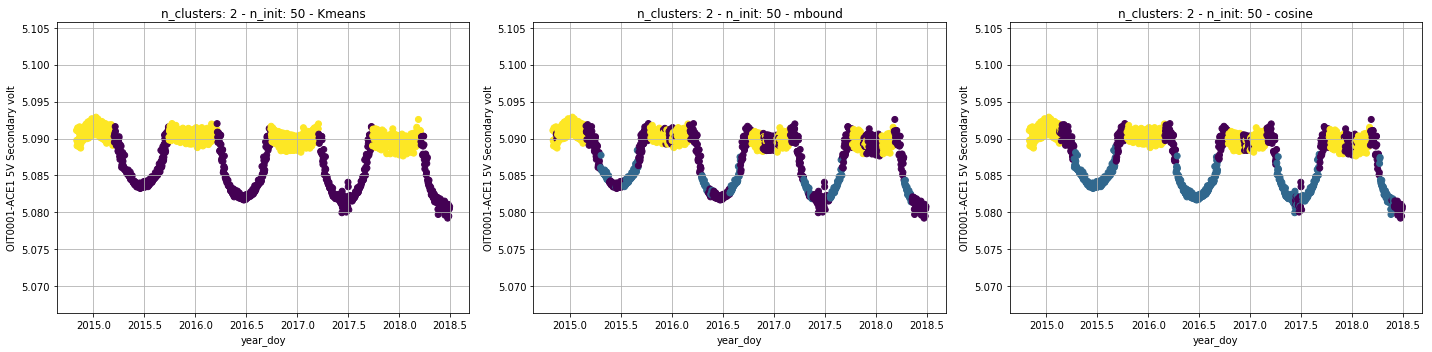

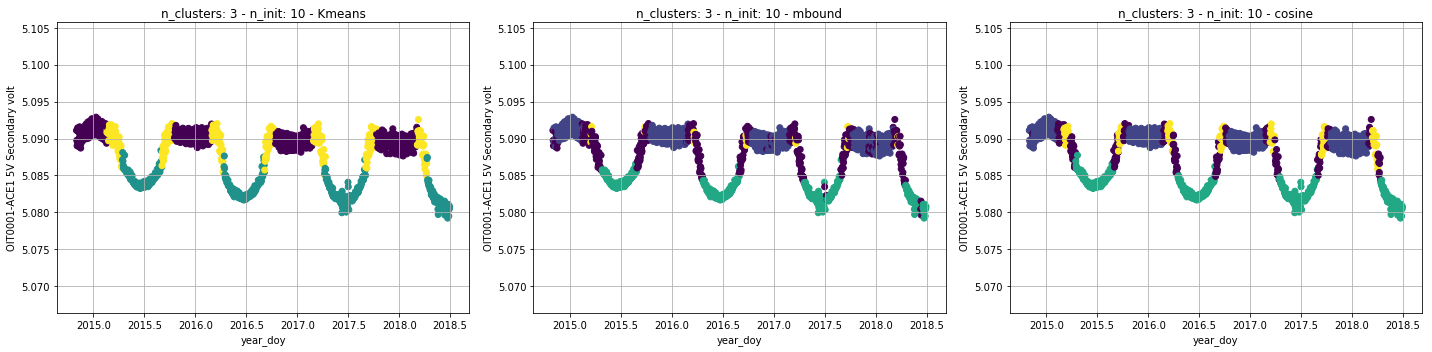

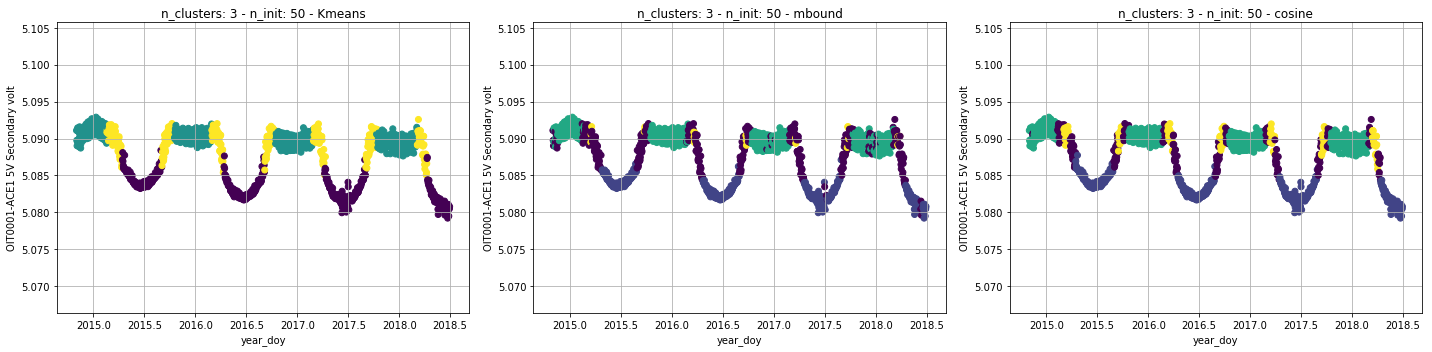

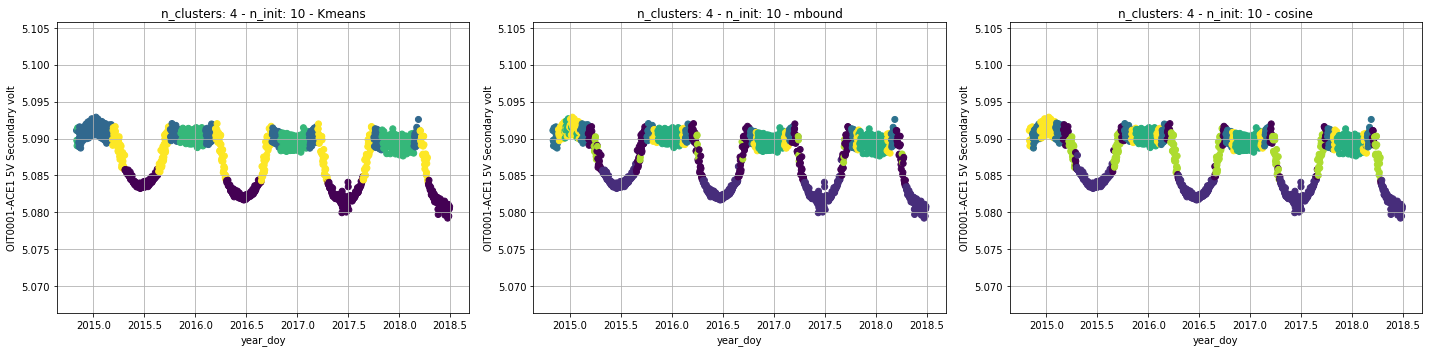

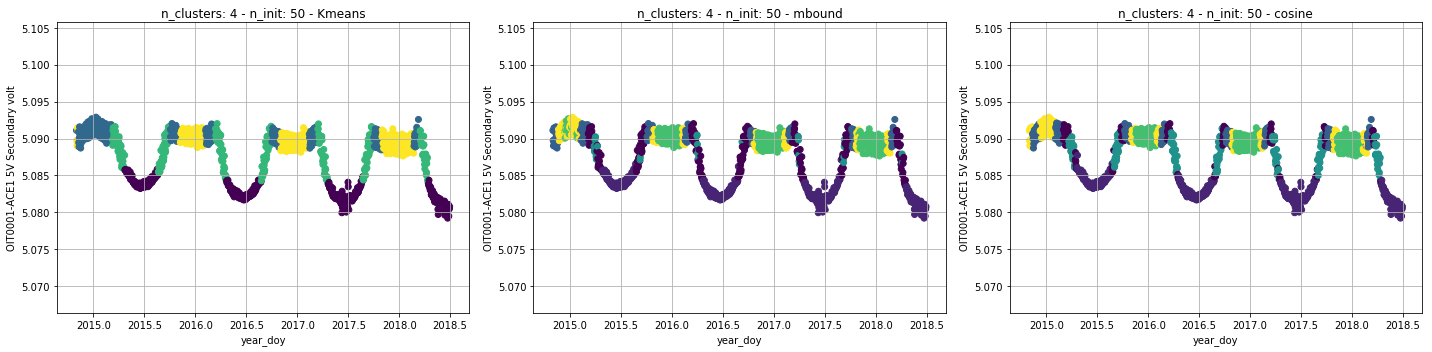

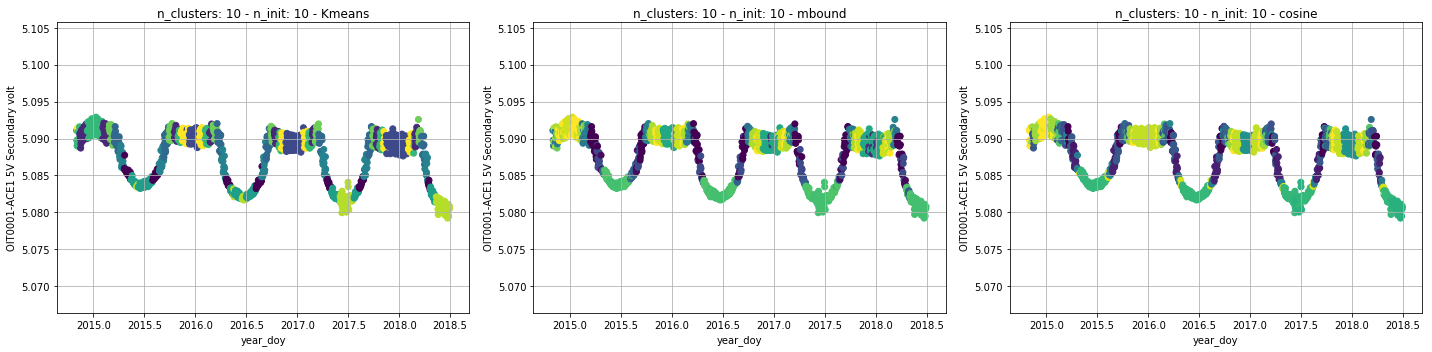

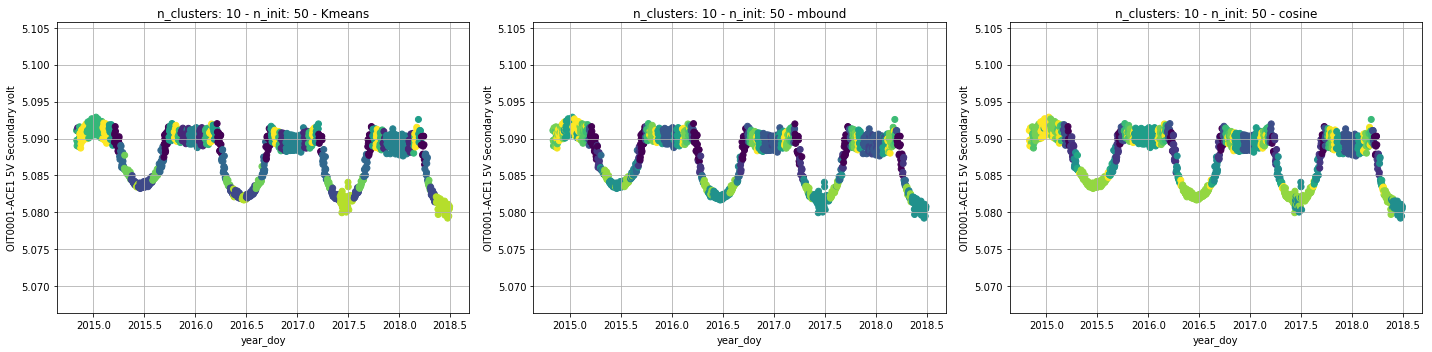

In [25]:
x_case='year_doy'
n_init=[10,50]
yi='OIT0001'
X=sat.loc[:,var_int]
for  cl in cl_num:
    stat_dict_red[cl]={}
    for n in n_init:
        km=KMeans(n_clusters=cl,n_init=n)
        km.fit(X)
        stat_dict_red[cl].update({n:km.cluster_centers_.ravel()})
        y=km.predict(X)
        pd_ci,_=get_nearest_cent_mbound(X,[0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4],km.cluster_centers_)
        pd_cos,_=get_nearest_cent_cosine(X,0.1,km.cluster_centers_)
        c_class=(y,pd_ci['merge'],pd_cos['merge'])
        c_class_names=('Kmeans','mbound','cosine')
        fig, ax = plt.subplots(1,len(c_class),figsize=(20,5))
        for ci,axj,ci_name in zip(c_class,ax,c_class_names):
            axj.set(title='n_clusters: ' + str(cl) + ' - ' + 'n_init: ' + str(n) + ' - ' +ci_name)
            axj.scatter(sat[x_case],sat[yi],c=ci)
            axj.set_xlabel(x_case)
            axj.set_ylabel(yi+'-'+sat_names[yi])
            axj.grid(True)
        plt.tight_layout()

En las graficas anteriores las imagenes de la izquierda corresponden a la clasificacion de Kmeans y centro a la segmentacion a partir de *get_nearest_cent_mbound* y a la derecha la correspondiente a *get_nearest_cent_cosine*.

Estrictamente hablando los metodos pretenden segmentar el set clasificando cada medicion como dentro de un cluster o no. A partir de esta informacion se hace mas facil determinar los "mas cercanos" (una vez que se defina una metrica).

#### Métricas de evaluación de soluciones de clustering basadas en testigos
Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

Se podrian implementar algo asi como "vectores de estado". Utilizamos dos Telemetrias a modo de ejemplo:
y_case=['OIT0001','OIT0094']

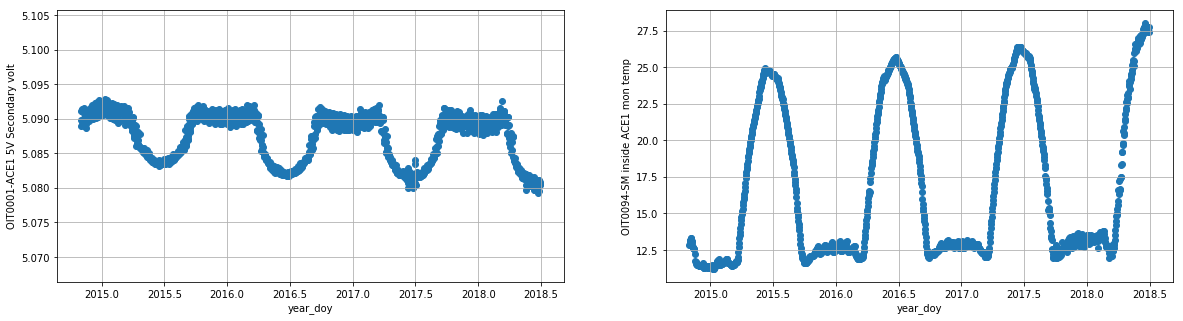

In [26]:
y_case=['OIT0001','OIT0094']
fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
for yi,axj in zip(y_case,ax):
    axj.scatter(sat[x_case],sat[yi])
    axj.set_xlabel(x_case)
    axj.set_ylabel(yi+'-'+sat_names[yi])
    axj.grid(True)

A partir de las graficas anteriores podemos observar (esta seria la parte de conocimiento del area + graficas) que en cada mediado de año (es decir que el comportamiento es estacional), una temperatura (OIT0094) en el rango [20,28] debe ir acompañada de un voltaje (OIT0001) en el rango [5.078,5.085].
Asimismo otro regimen esta en, OIT0094<15 & OIT0001>5.087. Cada uno de estos rangos los podemos pensar como vectores de estado alrededor de los cuales el sistema evoluciona (o deberia evolucionar).

Entonces podemos utilizar esta informacion para la formación de clusters.

In [68]:
# Low
rl_OIT0001=np.logical_and(sat.OIT0001>5.078,sat.OIT0001<5.085)
rl_OIT0094=np.logical_and(sat.OIT0094>20,sat.OIT0094<28)
rl_join=np.logical_and(rl_OIT0001,rl_OIT0094)
# High
rh_OIT0001=sat.OIT0001>5.087
rh_OIT0094=sat.OIT0094<15
rh_join=np.logical_and(rh_OIT0001,rh_OIT0094)
# Medium
rm=np.logical_and(~rl_join,~rh_join)
# Merge
rl=(rl_join,rh_join,rm)
#Armamos un vector de clasificacion similar al que daria KMeans
y_range=np.zeros(sat.shape[0])



## KMeans daria  -- Ppara sacar las clases
X=sat.loc[:,y_case]
km=KMeans(n_clusters=3,n_init=10)
km.fit(X)
y=km.predict(X)
#

indexes = np.unique(y, return_index=True)[1]
y_clases=[y[index] for index in sorted(indexes)]

y_range[rl_join]=y_clases[2]
y_range[rm]=y_clases[1]
y_range[rh_join]=y_clases[0]

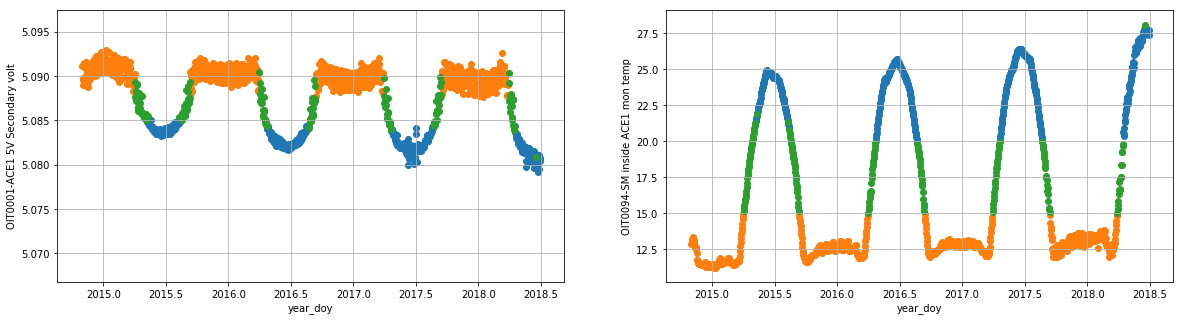

In [69]:
y_case=['OIT0001','OIT0094']
fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
for x in rl:
        
    for yi,axj in zip(y_case,ax):
        axj.scatter(sat[x][x_case],sat[x][yi])
        axj.set_xlabel(x_case)
        axj.set_ylabel(yi+'-'+sat_names[yi])
        axj.grid(True)

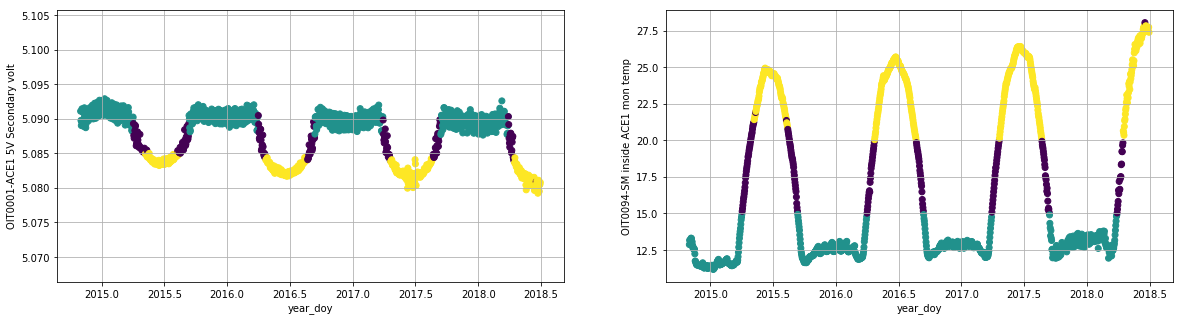

In [70]:
#Veamos que da lo mismo si lo hacemos en formato KMeans
fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
for yi,axj in zip(y_case,ax):
    axj.scatter(sat[x_case],sat[yi],c=y_range)
    axj.set_xlabel(x_case)
    axj.set_ylabel(yi+'-'+sat_names[yi])
    axj.grid(True)

En funcion de esto observamos que podemos definir los regimenes necesarios para especificar que "clusters" estarian bien constituidos. El paso siguiente seria identicar estas muestras (lo cual ya esta hecho en rl). En cada rango podriamos calcular un "centroide" y ver si resulta similar para un KMeans con n_estimators=3 poe ejemplo, asimismo podriamos contratastar los clusters asignados en una (KMeans) y otra forma (la explicada en estas lineas - testigos) y observar la correspondencia de las soluciones. 

In [71]:
## KMeans ya lo estimamos!
#X=sat.loc[:,y_case]
#km=KMeans(n_clusters=3,n_init=10)
#km.fit(X)
#y=km.predict(X)

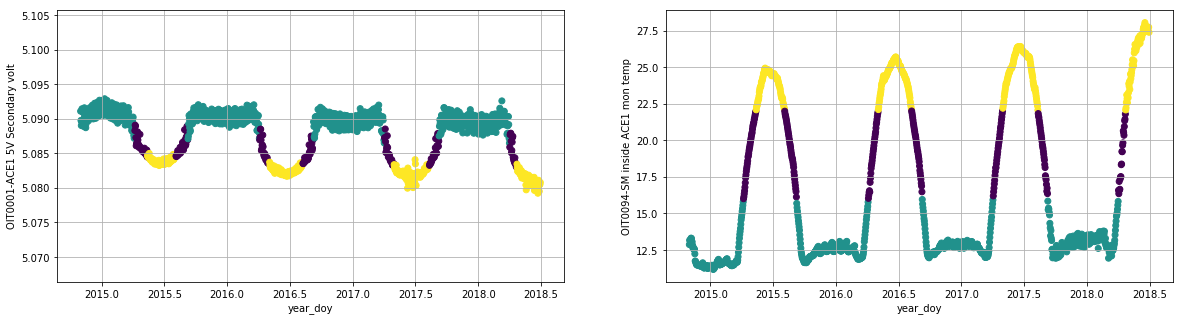

In [72]:
fig, ax = plt.subplots(1,len(y_case),figsize=(20,5))
for yi,axj in zip(y_case,ax):
    axj.scatter(sat[x_case],sat[yi],c=y)
    axj.set_xlabel(x_case)
    axj.set_ylabel(yi+'-'+sat_names[yi])
    axj.grid(True)

Vemos que el metodo de rangos funciona en forma similar a KMeans con variaciones respecto a los centros definidos. Igualmente en lineas generales, se asemejan en buena forma (esto puede verse en el grafico de clasificaciones).

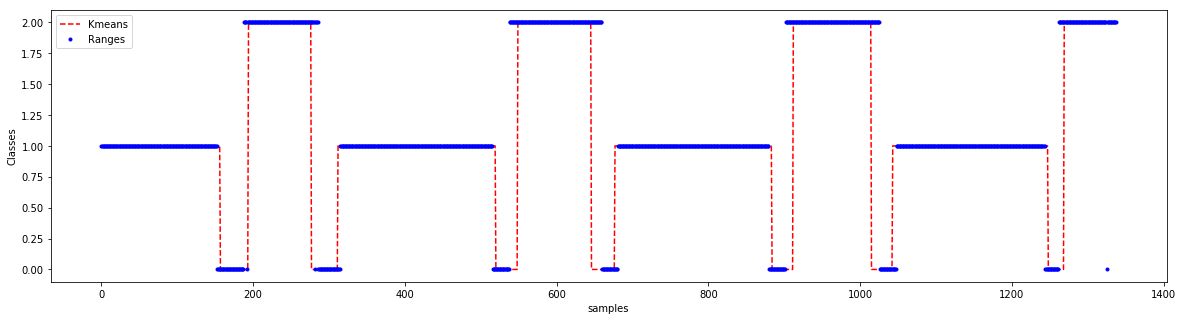

In [73]:
# Veamos la clasificacion
plt.figure(figsize=(20,5))
plt.plot(y,'--r')
plt.plot(y_range,'.b')
plt.xlabel('samples')
plt.ylabel('Classes')
plt.legend(['Kmeans','Ranges'])

Si definimos alguna como patron podriamos computar sin mayores complicaciones la tasa de "aciertos" o "fallos".